In [ ]:
#!unzip /content/drive/MyDrive/GelarRasa24/Study_Case_DSC.zip -d /content/drive/MyDrive/GelarRasa24

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# import passive agressive classifier
from sklearn.linear_model import PassiveAggressiveClassifier

# import calibrated classifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.ensemble import (
    GradientBoostingClassifier,
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier
)
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, SGDClassifier, Perceptron

from sklearn.metrics import classification_report

# Import accuracy, precision, recall, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Gelar Rasa 2024/sales.xlsx')
df

SalesID CustomerID SalesRepID ProductID  Sales Quantity (in tons)  \
0     210001       R012     BB1988     S2022                        16   
1     210002       R012     AA1986     S2022                        18   
2     210003       R078     CG1990     F3031                         4   
3     210004       R056     BF1988     F3030                         1   
4     210005       R078     CG1990     F3032                         8   
..       ...        ...        ...       ...                       ...   
994   230376       R078     DH1985     S2020                         1   
995   230377       R078     CG1990     S2021                         7   
996   230378       R012     BB1988     S2022                        22   
997   230379       R012     BB1988     F3032                        12   
998   230380       R078     DH1985     F3030                         6   

     Sales Amount (in US$)  Year Month  Day  
0                  16000.0  2021   Jan    3  
1                  18000.0  2021   Jan    3  
2                   4000.0  2021   Jan    4  
3                   1300.0  2021   Jan    6  
4                   5600.0  2021   Jan    6  
..                     ...   ...   ...  ...  
994                 3000.0  2023   Dec   15  
995                14000.0  2023   Dec   18  
996                22000.0  2023   Dec   19  
997                 8400.0  2023   Dec   21  
998                 7800.0  2023   Dec   27  

[999 rows x 9 columns]

# Bagian A

Anda telah diberikan kumpulan data yang berisi 1.000 catatan penjualan benih dan pupuk
dari cabang regional penyedia perlengkapan pertanian. Setiap catatan mencakup informasi
berikut:
- Sales ID (menunjukkan faktur penjualan tertentu)
- Customer ID (menunjukkan siapa pelanggan yang melakukan pembelian, dengan
total 4 pelanggan)
- SalesRep ID (menunjukkan perwakilan penjualan yang melakukan penjualan, dengan 8 perwakilan berbeda)
- Product ID (menunjukkan produk spesifik yang dijual, dengan total 6 produk
berbeda)
- Sales Quantity (jumlah produk yang dibeli dari setiap penjualan, dalam ton)
- Sales Amount (nilai moneter setiap penjualan, dalam US$)
- Date (tanggal faktur penjualan, Tahun, Bulan, Hari)

## Analisis Deskriptif

### a. Total Penjualan Tahunan tiap Produk
Hitung total penjualan tahunan untuk setiap produk selama periode tertentu.


In [ ]:
month = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
df['Month'] = df['Month'].apply(lambda x: month[x])

In [ ]:
# Extract year from the 'Date' column
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.month
df['Day'] = pd.to_datetime(df['Day'], format='%d').dt.day

In [ ]:
# Group by year and product, then sum the sales amount
annual_sales_in_usd = df.groupby(['Year', 'ProductID'])['Sales Amount (in US$)'].sum().reset_index()

# Display the pivoted table
pivoted_sales_in_usd = annual_sales_in_usd.pivot(index='Year', columns='ProductID', values='Sales Amount (in US$)')
pivoted_sales_in_usd['Total'] = pivoted_sales_in_usd.sum(axis=1)
pivoted_sales_in_usd

ProductID     F3030     F3031     F3032      S2020      S2021     S2022  \
Year                                                                      
2021       998400.0  639000.0  499800.0  1965000.0  1144000.0  731000.0   
2022       605800.0  725000.0  310800.0  1458000.0  1020000.0  456000.0   
2023       981500.0  735000.0  513800.0  2109000.0  1188000.0  762000.0   

ProductID      Total  
Year                  
2021       5977200.0  
2022       4575600.0  
2023       6289300.0

In [ ]:
# Group by year and product, then sum the sales amount
annual_sales_in_quantity = df.groupby(['Year', 'ProductID'])['Sales Quantity (in tons)'].sum().reset_index()

# Display the pivoted table
pivoted_sales_in_quantity = annual_sales_in_quantity.pivot(index='Year', columns='ProductID', values='Sales Quantity (in tons)')
pivoted_sales_in_quantity

ProductID  F3030  F3031  F3032  S2020  S2021  S2022
Year                                               
2021         768    639    714    655    572    731
2022         466    725    444    486    510    456
2023         755    735    734    703    594    762

In [ ]:
pivoted_sales_in_usd/pivoted_sales_in_quantity

ProductID   F3030   F3031  F3032   S2020   S2021   S2022  Total
Year                                                           
2021       1300.0  1000.0  700.0  3000.0  2000.0  1000.0    NaN
2022       1300.0  1000.0  700.0  3000.0  2000.0  1000.0    NaN
2023       1300.0  1000.0  700.0  3000.0  2000.0  1000.0    NaN

### b. Rata-rata Penjualan per Pelanggan
Tentukan rata-rata penjualan per pelanggan berdasarkan karakteristiknya.


In [ ]:
# Group by year and product, then sum the sales amount
Pelanggan_summary = df.groupby(['ProductID', 'CustomerID'])['Sales Quantity (in tons)'].mean().reset_index()

# Display the pivoted table
pivoted_customer_in_tons = Pelanggan_summary.pivot(index='ProductID', columns='CustomerID', values='Sales Quantity (in tons)')
#pivoted_customer_in_tons = pivoted_customer_in_tons/3
pivoted_customer_in_tons

CustomerID       F034       R012      R056      R078
ProductID                                           
F3030       16.381818  18.027778  4.815789  5.688889
F3031       18.341463  18.244444  5.686275  5.244444
F3032       17.777778  16.478261  5.162791  5.333333
S2020       16.851064  16.666667  5.729167  6.103448
S2021       17.243243  17.307692  5.307692  4.727273
S2022       17.466667  18.641026  6.186047  5.312500

In [ ]:
# prompt: pivotable with two index

# Group by year, product, and customer, then sum the sales amount
customer_sales_summary = df.groupby(['SalesRepID', 'ProductID', 'CustomerID'])['Sales Quantity (in tons)'].sum().reset_index()

# Display the pivoted table with two indices
pivoted_customer_sales = customer_sales_summary.pivot(index=['CustomerID', 'SalesRepID'], columns='ProductID', values='Sales Quantity (in tons)')
pivoted_customer_sales

ProductID              F3030  F3031  F3032  S2020  S2021  S2022
CustomerID SalesRepID                                          
F034       BC1984        432    401    354    428    366    359
           DD1988        469    351    286    364    272    427
R012       AA1986        325    405    514    399    403    332
           BB1988        324    416    244    201    272    395
R056       AE1987         93    143    113    129     97    143
           BF1988         90    147    109    146    110    123
R078       CG1990        120    148    141     63     72    100
           DH1985        136     88    131    114     84     70

### c. 3 Perwakilan dengan penjualan teratas
Identifikasi 3 perwakilan penjualan teratas berdasarkan total penjualan

In [ ]:
# prompt: pivotable with two index

# Group by year, product, and customer, then sum the sales amount
sales_summary = df.groupby(['SalesRepID', 'ProductID'])['Sales Amount (in US$)'].sum().reset_index()

# Display the pivoted table with two indices
pivoted_sales = sales_summary.pivot(index=['SalesRepID'], columns='ProductID', values='Sales Amount (in US$)')
pivoted_sales['Total'] = pivoted_sales.sum(axis=1)
pivoted_sales.sort_values(by='Total', ascending=False).head(3)

ProductID      F3030     F3031     F3032      S2020     S2021     S2022  \
SalesRepID                                                                
BC1984      561600.0  401000.0  247800.0  1284000.0  732000.0  359000.0   
AA1986      422500.0  405000.0  359800.0  1197000.0  806000.0  332000.0   
DD1988      609700.0  351000.0  200200.0  1092000.0  544000.0  427000.0   

ProductID       Total  
SalesRepID             
BC1984      3585400.0  
AA1986      3522300.0  
DD1988      3223900.0

In [ ]:
best3_Sales_Rep = pivoted_sales.sort_values(by='Total', ascending=False).head(3).index

## Visualisasi Data

Menggunakan Power BI atau aplikasi serupa, buat visualisasi berikut:


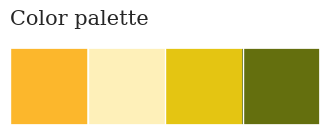

In [ ]:
# Palette
sns.palplot(['#fcb72c', '#fef0b9', '#e4c512','#646f0e'])

plt.title("Color palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

### 1. Total penjualan untuk setiap produk yang disegmentasi berdasarkan jenis pelanggan.


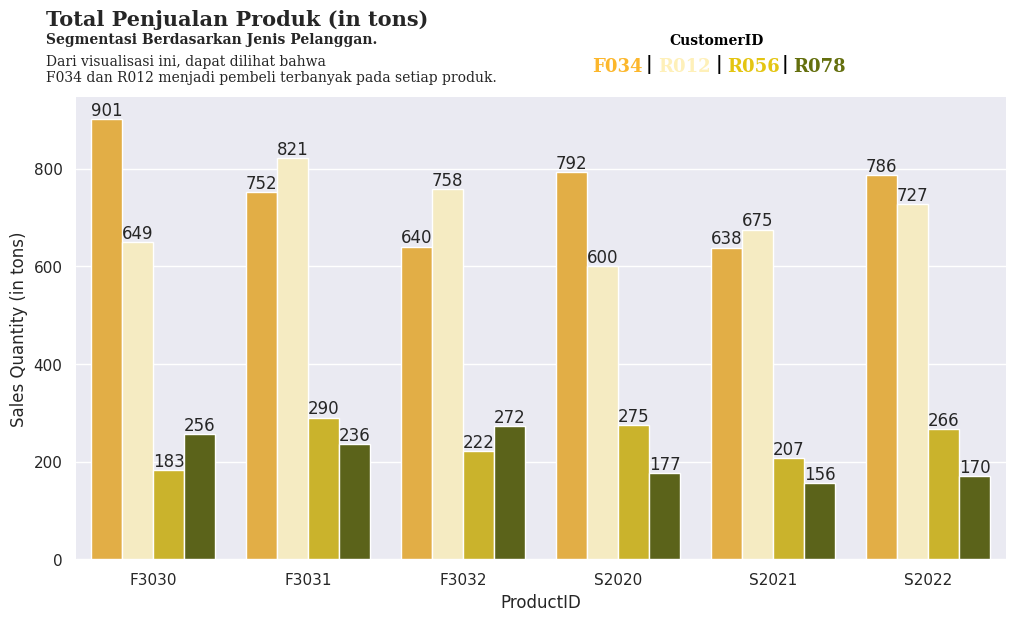

In [ ]:
# Group data by Product and Customer ID, summing the sales amounts
sales_by_product_customer = df.groupby(['ProductID', 'CustomerID'])['Sales Quantity (in tons)'].sum().reset_index()

# Create the bar chart using seaborn
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_palette = sns.color_palette(['#fcb72c', '#fef0b9', '#e4c512','#646f0e'])  # Choose your preferred color palette
sns.barplot(
    x='ProductID',
    y='Sales Quantity (in tons)',
    hue='CustomerID',
    data=sales_by_product_customer,
    palette=custom_palette
)

# Add title and labels
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Add annotations
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.f')

fig.text(0.1, 1, 'Total Penjualan Produk (in tons)', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.97, 'Segmentasi Berdasarkan Jenis Pelanggan.', fontsize=10, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.88,
'''
Dari visualisasi ini, dapat dilihat bahwa
F034 dan R012 menjadi pembeli terbanyak pada setiap produk.
'''

, fontsize=10, fontweight='light', fontfamily='serif')

ax.legend().set_visible(False)
fig.text(0.620,0.968,"CustomerID", fontweight="bold", fontfamily='serif', fontsize=10, color='black')
fig.text(0.555,0.924,"F034", fontweight="bold", fontfamily='serif', fontsize=13, color='#fcb72c')
fig.text(0.600,0.928,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
fig.text(0.610,0.924,"R012", fontweight="bold", fontfamily='serif', fontsize=13, color='#fef0b9')
fig.text(0.658,0.928,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
fig.text(0.668,0.924,"R056", fontweight="bold", fontfamily='serif', fontsize=13, color='#e4c512')
fig.text(0.713,0.928,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
fig.text(0.723,0.924,"R078", fontweight="bold", fontfamily='serif', fontsize=13, color='#646f0e')


plt.show()


### 2. Proporsi total penjualan menurut jenis pelanggan untuk setiap bulan dalam setahun.
Visualisasi ini harus menyoroti tren musiman penjualan di seluruh jenis pelanggan.


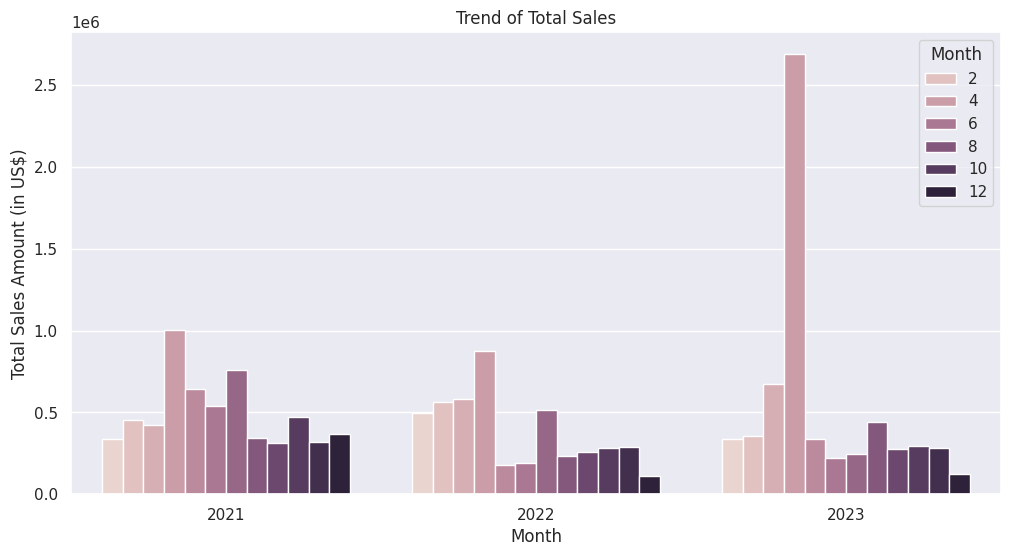

In [ ]:
# Group the data by product and customer ID, then sum the sales amounts
sales_by_month = df.groupby(['Year', 'Month'])['Sales Amount (in US$)'].sum().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Sales Amount (in US$)', hue='Month', data=sales_by_month)
plt.title('Trend of Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount (in US$)')
plt.show()

In [ ]:
# Group the data by product and customer ID, then sum the sales amounts
sales_by_month = df.groupby(['Year', 'Month',  'CustomerID'])['Sales Amount (in US$)'].sum().reset_index()
sales_by_month

Year  Month CustomerID  Sales Amount (in US$)
0    2021      1       F034                88800.0
1    2021      1       R012               131700.0
2    2021      1       R056                73200.0
3    2021      1       R078                45400.0
4    2021      2       F034               132300.0
..    ...    ...        ...                    ...
138  2023     11       R056                20000.0
139  2023     11       R078                11200.0
140  2023     12       R012                55100.0
141  2023     12       R056                30000.0
142  2023     12       R078                41300.0

[143 rows x 4 columns]

In [ ]:
tahun_2021 = sales_by_month[sales_by_month['Year'] == 2021]
tahun_2022 = sales_by_month[sales_by_month['Year'] == 2022]
tahun_2023 = sales_by_month[sales_by_month['Year'] == 2023]

### 3. Kinerja penjualan dari tiga perwakilan penjualan teratas selama periode pelaporan tiga tahun.
Sertakan penanda untuk perubahan atau peristiwa signifikan yang mungkin berdampak pada kinerja penjualan mereka.

In [ ]:
# Group the data by year, month, and sales representative, then sum the sales amounts
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
sales_by_rep_month = df[df['SalesRepID'].isin(best3_Sales_Rep)].groupby(['Date', 'SalesRepID'])['Sales Amount (in US$)'].sum().reset_index()
sales_by_rep_month

Date SalesRepID  Sales Amount (in US$)
0  2021-01-01     AA1986                88700.0
1  2021-01-01     BC1984                88800.0
2  2021-02-01     AA1986               185200.0
3  2021-02-01     BC1984                27300.0
4  2021-02-01     DD1988               105000.0
..        ...        ...                    ...
94 2023-10-01     AA1986                 8400.0
95 2023-10-01     BC1984                81500.0
96 2023-10-01     DD1988                42000.0
97 2023-11-01     AA1986               156000.0
98 2023-11-01     BC1984                37800.0

[99 rows x 3 columns]

In [ ]:
sales_by_rep_month['SalesRepID'].value_counts()

SalesRepID
AA1986    34
BC1984    33
DD1988    32
Name: count, dtype: int64

Dapat dilihat bahwa dalam 3 tahun, seharusnya terdapat 36 data bulanan, maka perlu dilakukan penyesuaian dengan mengisi bulan yang tidak ada dengan nol.

- AA1986: 2021-11, 2023-12
- BC1984: 2022-03, 2023-07, 2023-12
- DD1988: 2021-01, 2022-05, 2023-11, 2023-12


In [ ]:
new_data = {
    'Date': ['2021-11-01', '2023-12-01', '2022-03-01', '2023-07-01', '2023-12-01', '2021-01-01', '2022-05-01', '2023-11-01', '2023-12-01'],
    'SalesRepID': ['AA1986', 'AA1986', 'BC1984', 'BC1984', 'BC1984', 'DD1988', 'DD1988', 'DD1988', 'DD1988'],
    'Sales Amount (in US$)': [0,0,0,0,0,0,0,0,0]}
new_df = pd.DataFrame(new_data)
new_df['Date'] = pd.to_datetime(new_df['Date'])
sales_by_rep_month= pd.concat([sales_by_rep_month, new_df], ignore_index=True)

In [ ]:
sales_by_rep_month = sales_by_rep_month.sort_values(by='Date')
sales_by_rep_month = sales_by_rep_month.reset_index(drop=True)
sales_by_rep_month

Date SalesRepID  Sales Amount (in US$)
0   2021-01-01     AA1986                88700.0
1   2021-01-01     DD1988                    0.0
2   2021-01-01     BC1984                88800.0
3   2021-02-01     AA1986               185200.0
4   2021-02-01     BC1984                27300.0
..         ...        ...                    ...
103 2023-11-01     DD1988                    0.0
104 2023-11-01     BC1984                37800.0
105 2023-12-01     AA1986                    0.0
106 2023-12-01     BC1984                    0.0
107 2023-12-01     DD1988                    0.0

[108 rows x 3 columns]

In [ ]:
sales_by_rep_month['SalesRepID'].value_counts().sort_index(ascending=True).index

Index(['AA1986', 'BC1984', 'DD1988'], dtype='object', name='SalesRepID')

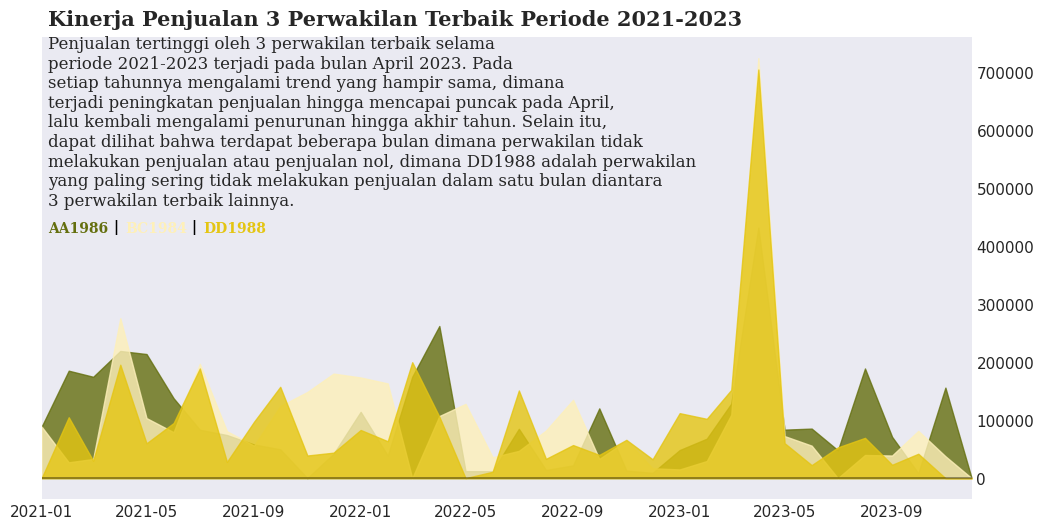

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ['#646f0e', '#fef0b9', '#e4c512']

ax.yaxis.tick_right()

ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

for i, mtv in enumerate(sales_by_rep_month['SalesRepID'].value_counts().sort_index(ascending=True).index):
    mtv_rel = sales_by_rep_month[sales_by_rep_month['SalesRepID'] == mtv]
    ax.fill_between(mtv_rel.Date, 0, mtv_rel['Sales Amount (in US$)'], color=color[i], label=mtv,alpha=0.8)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
#ax.set_xticklabels(year_month_AA1986, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

fig.text(0.13, 0.90, 'Kinerja Penjualan 3 Perwakilan Terbaik Periode 2021-2023', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.535,
"""
Penjualan tertinggi oleh 3 perwakilan terbaik selama
periode 2021-2023 terjadi pada bulan April 2023. Pada
setiap tahunnya mengalami trend yang hampir sama, dimana
terjadi peningkatan penjualan hingga mencapai puncak pada April,
lalu kembali mengalami penurunan hingga akhir tahun. Selain itu,
dapat dilihat bahwa terdapat beberapa bulan dimana perwakilan tidak
melakukan penjualan atau penjualan nol, dimana DD1988 adalah perwakilan
yang paling sering tidak melakukan penjualan dalam satu bulan diantara
3 perwakilan terbaik lainnya.

"""

, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.13,0.555,"AA1986", fontweight="bold", fontfamily='serif', fontsize=10, color='#646f0e')
fig.text(0.185,0.558,"|", fontweight="bold", fontfamily='serif', fontsize=10, color='black')
fig.text(0.195,0.555,"BC1984", fontweight="bold", fontfamily='serif', fontsize=10, color='#fef0b9')
fig.text(0.250,0.558,"|", fontweight="bold", fontfamily='serif', fontsize=10, color='black')
fig.text(0.260,0.555,"DD1988", fontweight="bold", fontfamily='serif', fontsize=10, color='#e4c512')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Analisis dan Pelaporan

Pertama, dari total penjualan tahunan, produk S2020 terus mencatatkan angka penjualan tertinggi dalam nilai moneter, menandakan tingginya permintaan dan kepercayaan konsumen terhadap produk ini dibanding produk lainnya. Tren penjualan tahunan pada produk ini juga menunjukkan adanya penurunan di tahun 2022, diikuti peningkatan pada tahun 2023, yang mungkin mengindikasikan adanya faktor eksternal seperti perubahan ekonomi atau cuaca yang mempengaruhi permintaan. Hal ini bisa dijadikan fokus dalam strategi pemasaran dan promosi, terutama dengan mendorong penjualan produk ini di area dengan permintaan tinggi.

Kedua, pelanggan F034 menunjukkan pola pembelian yang tinggi secara konsisten untuk berbagai produk, terutama produk F3030, yang mengindikasikan adanya ketertarikan khusus terhadap produk tersebut. Selain itu, pelanggan R012 mencatat pembelian tinggi pada produk F3031. Pelanggan dengan pembelian yang lebih rendah, seperti R056 dan R078, menunjukkan preferensi yang lebih bervariasi, tetapi dengan volume yang lebih kecil. Untuk meningkatkan penjualan pada pelanggan dengan profil seperti ini, perusahaan dapat mempertimbangkan strategi promosi atau diskon khusus untuk mendorong mereka melakukan pembelian yang lebih besar atau lebih sering.

Ketiga, tiga perwakilan penjualan teratas, yaitu BC1984, AA1986, dan DD1988, mencatat total penjualan yang signifikan, mengindikasikan bahwa pengalaman dan mungkin sertifikasi tambahan telah membantu mereka dalam mencapai kinerja terbaik. Sertifikasi dan pelatihan tambahan bagi perwakilan penjualan lainnya berpotensi meningkatkan performa seluruh tim. Strategi ini dapat membantu meratakan kinerja dan meningkatkan pendapatan.

Pada visualisasi pertama, dapat dilihat bahwa pelanggan F034 dan R012 merupakan pembeli terbesar untuk hampir semua jenis produk. F034 menjadi pembeli utama dengan jumlah pembelian tertinggi pada produk F3030, S2020, dan S2022. R012 menunjukkan angka pembelian yang dominan pada produk F3031, F3032, dan S2021. Pelanggan lain seperti R056 dan R078 juga berkontribusi pada penjualan, meskipun dengan volume yang lebih rendah. Dari data ini, terlihat jelas bahwa pelanggan F034 dan R012 adalah segmen yang sangat penting dan potensial, sehingga strategi pemasaran yang lebih fokus pada mereka bisa menjadi kunci untuk meningkatkan penjualan pada produk tertentu yang mereka beli dalam jumlah besar.

Pada visualisasi ketiga, terlihat bahwa puncak penjualan terjadi pada bulan April 2023. Setiap tahunnya, tren penjualan menunjukkan pola yang hampir serupa, di mana penjualan mulai meningkat hingga mencapai puncaknya pada bulan April, kemudian mengalami penurunan bertahap hingga akhir tahun. Terdapat fluktuasi penjualan yang cukup signifikan, terutama terlihat bahwa di beberapa bulan, beberapa perwakilan tidak melakukan penjualan sama sekali, atau penjualannya mencapai angka nol. Perwakilan DD1988 merupakan yang paling sering mengalami bulan tanpa penjualan dibandingkan dengan dua perwakilan lainnya. Hal ini menunjukkan adanya ketidakkonsistenan yang mungkin perlu diatasi untuk menjaga performa penjualan yang lebih stabil sepanjang tahun.



# Bagian B
Perusahaan Anda, Loans 'R Us, adalah pemimpin dalam industri kartu kredit dan pinjaman yang dipercaya oleh pelanggan di seluruh dunia. Meskipun kinerja perusahaan baik, Anda merasa perusahaan dapat berbuat lebih baik dengan **mengurangi jumlah penipuan kartu kredit** yang meningkat akhir-akhir ini. Salah satu karyawan Anda menyarankan agar Anda memanfaatkan kekuatan analisis data dan menganalisis data yang Anda miliki di database.
Beberapa pertanyaan/kekhawatiran yang ingin Anda temukan jawabannya:

In [ ]:
# Fungsi missing check
# Fungsi ini digunakan untuk mengecek jumlah missing value, keunikan tiap kolom
def missing_check(df) :
    wadah = []
    for i in df.columns :
        wadah.append(df[i].unique())
    missing = df.isnull().sum()
    per_miss = missing/len(df)
    data_type = df.dtypes
    number_unique = df.nunique()
    return pd.DataFrame({"Missing":missing,
                        "Percent_Missing":per_miss,
                        "Data_Types":data_type,
                        "Number_of_unique":number_unique,
                        "Unique":wadah}).style.format({'Percent_Missing': "{:.2%}"})

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Gelar Rasa 2024/fraud.xlsx')
data.head()

In [ ]:
missing_check(data)

In [ ]:
data['is_fraud'].value_counts()

is_fraud
0                         12600
1                          1844
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: count, dtype: int64

Terdapat beberapa data dengan format yang berbeda pada kolom is_fraud, maka dilakukan beberapa penyesuaian.

In [ ]:
data['is_fraud'][data['is_fraud'] == '1"2020-12-24 16:56:24"'] = 1
data['is_fraud'][data['is_fraud'] == '0"2019-01-01 00:00:44"'] = 0

<ipython-input-15-3208587a262d>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['is_fraud'][data['is_fraud'] == '1"2020-12-24 16:56:24"'] = 1
<ipython-input-15-3208587a262d>:1: SettingWithCopyWarning: 
A value is trying to be set on a 

In [ ]:
len(data)

14446

In [ ]:
data['is_fraud'].value_counts(normalize=True) * 100

is_fraud
0    87.228298
1    12.771702
Name: proportion, dtype: float64

## Explonatory Data Analysis & Data Cleaning


### Variabel Nomor Transaksi (trans_num)

In [ ]:
data['trans_num'].value_counts()

trans_num
a3806e984cec6ac0096d8184c64ad3a1    2
9bc5cb494abc3af2b02ca33e0d076f74    2
049087fe5d27b77c7238fa46bb18c99d    2
fdc202f9f1dd556a51775c6d8060c58d    2
dec7f564c518a3f5878016461d766ffa    2
                                   ..
eac3967b5ec8e85d4fe085f834965acc    1
4b2d00d9a2ff7a4e739e71fd73b71ddc    1
afdc7e0a075d0117ae84958eed5d1ad8    1
0586467e560d0c0786d3bc9db39d9df9    1
65e7370f473f9b9d75796c8033a7c929    1
Name: count, Length: 14383, dtype: int64

In [ ]:
# Find transaction numbers that appear exactly twice
transaction_counts = data['trans_num'].value_counts()
duplicate_transactions = transaction_counts[transaction_counts == 2].index

# Filter the DataFrame to include only these duplicate transactions
duplicate_trans_data = data[data['trans_num'].isin(duplicate_transactions)]

duplicate_trans_data['is_fraud'].value_counts()

is_fraud
1    126
Name: count, dtype: int64

Dalam variabel trans_num didapatkan bahwa terdapat beberapa transaksi dengan nomor transaksi yang sama. Pada transaksi demikian, diketahui bahwa seluruh transaksi ini merupakan penipuan (fraud). Dicurigai bahwa data merupakan data duplikat.

#### Data Duplikat

In [ ]:
data.duplicated().sum()

63

Setelah dilakukan pengecekan data duplikat, didapatkan bahwa tedapat **63 data duplikat**, hal ini **sesuai** dengan jumlah dimana terdapat **126 data dengan nomor transaksi sama**. Maka dilakukan penghapusan (**drop**) data untuk analisis berikutnya.

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data['trans_num'].value_counts()

trans_num
a3806e984cec6ac0096d8184c64ad3a1    1
71155d42d65c61cc864671d1ddd51281    1
6d6338ec95b5b7d457e2cc83acc5b14c    1
c56b691966a49e7742c0efc2ffe96b70    1
54dedc941fdf9222c7c7808eedd8c340    1
                                   ..
63dac353a22364ff0b40f412e92bed97    1
7340e008bec1a7edcddd7f380d0e3197    1
62d7382555b4252e72e88f5fde99ca2c    1
c28dd625038d558117f46f42d6ebfb14    1
65e7370f473f9b9d75796c8033a7c929    1
Name: count, Length: 14383, dtype: int64

### Variabel Waktu Transaksi (trans_date_trans_time)
Untuk mendapatkan insight lebih dari variabel ini, dilakukan **penyeragaman tipe data dan partisi** menjadi variabel tahun, bulan, tanggal, jam, menit, detik, dan nama hari dalam seminggu.

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [ ]:
data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month
data['day'] = data['trans_date_trans_time'].dt.day
data['hour'] = data['trans_date_trans_time'].dt.hour
data['minute'] = data['trans_date_trans_time'].dt.minute
data['second'] = data['trans_date_trans_time'].dt.second
data['day_of_week'] = data['trans_date_trans_time'].dt.day_name()

In [ ]:
data['year'].value_counts()

year
2019    7580
2020    6803
Name: count, dtype: int64

In [ ]:
frekuensi_bulanan = data.groupby(['year', 'month']).size().unstack(fill_value=0)
frekuensi_bulanan

month    1    2    3    4    5    6    7    8    9    10   11    12
year                                                               
2019   3519  280  366  329  399  396  477  490  279  327  346   372
2020     68   95   74   74   49   48   75   83   84   78   60  6015

In [ ]:
# Group by year and is_fraud
grouped_data = data.groupby([ 'year', 'is_fraud',  'month']).size().unstack(fill_value=0)
grouped_data.sort_index(ascending=True)

month            1    2    3    4    5    6    7    8    9    10   11    12
year is_fraud                                                              
2019 0         3403  220  250  261  283  367  411  417  213  248  275   254
     1          116   60  116   68  116   29   66   73   66   79   71   118
2020 0            0    0    0    0    0    0    0    0    0    0    0  5999
     1           68   95   74   74   49   48   75   83   84   78   60    16

Transaksi **terbanyak 2019** terjadi pada **Januari** lalu relatif stabil diantara 200 hingga 450 hingga akhir tahun.

Sedangkan pada **2020**, traksaksi terbanyak pada **Desember** dengan bulan yang lain hanya dibawah 100 transaksi dan **seluruh transaksi selain pada bulan desember adalah penipuan**, hal ini menjadi salah satu anomali.

In [ ]:
# Group by day and is_fraud
grouped_data = data.groupby(['day', 'is_fraud']).size().unstack(fill_value=0)
grouped_data.sort_index(ascending=True)[(grouped_data[1] == 0) | (grouped_data[0] == 0)].T

day       2   3   4   5   6   7   8   9   10  11  12  23
is_fraud                                                
0          0   0   0   0   0   0   0   0   0   0   0   0
1         58  70  31  59  47  53  65  75  54  32  93  63

Dapat dilihat juga bahwa, transaksi pada **tanggal 2 hingga 12 dan tanggal 23 selalu transaksi penipuan.**

In [ ]:
# Group by day and is_fraud
grouped_data = data.groupby(['hour', 'is_fraud']).size().unstack(fill_value=0)
grouped_data['fraud_proportion'] = grouped_data[1]/(grouped_data[0]+grouped_data[1])
grouped_data.sort_values(by = 'fraud_proportion' ,ascending=False).head(8)

is_fraud    0    1  fraud_proportion
hour                                
23        650  459          0.413886
22        652  452          0.409420
0         413  168          0.289157
1         439  168          0.276771
2         379  140          0.269750
3         417  143          0.255357
16        629   23          0.035276
15        647   22          0.032885

Pada **jam 11 malam hingga 3 pagi** memiliki peluang terjadi penipuan paling tinggi.

### Variabel Jumlah Tagihan (amt)

<ipython-input-253-863bc0619fd1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['amt'])


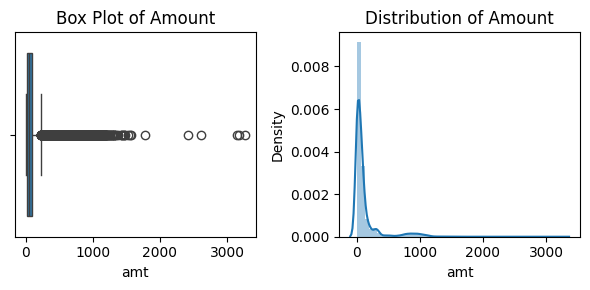

In [ ]:
# prompt: visualize amt using boxplot and dist

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['amt'])
plt.title('Box Plot of Amount')

plt.subplot(1, 2, 2)
sns.distplot(data['amt'])
plt.title('Distribution of Amount')

plt.tight_layout()
plt.show()

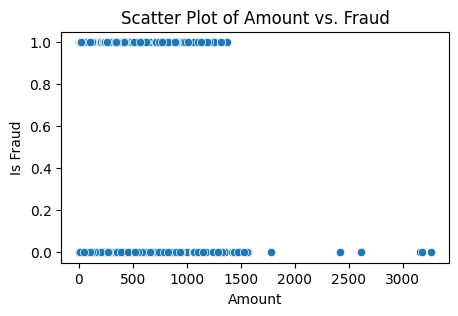

In [ ]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='amt', y='is_fraud', data=data)
plt.title('Scatter Plot of Amount vs. Fraud')
plt.xlabel('Amount')
plt.ylabel('Is Fraud')
plt.show()

Dapat dilihat bahwa Jumlah tagihan setiap transaksi memiliki outlier dan berdistribusi menceng ke kanan akan tetapi **jumlah tagihan yang tinggi** justru cenderung **bukan penipuan**, terutama transaksi dengan tagihan **lebih dari 1500**.

### Variabel Lokasi Pembelian (city dan state)

In [ ]:
# Group by 'state', then count occurrences of 'is_fraud' values (0 and 1)
fraud_counts = data.groupby(['state'])['is_fraud'].value_counts().unstack(fill_value=0)

fraud_counts[(fraud_counts[1] == 0) | (fraud_counts[0] == 0)]

Empty DataFrame
Columns: [0, 1]
Index: []

In [ ]:
# Group by 'city' and 'state', then count occurrences of 'is_fraud' values (0 and 1)
fraud_counts = data.groupby(['state', 'city'])['is_fraud'].value_counts().unstack(fill_value=0)

fraud_counts[(fraud_counts[1] == 0) | (fraud_counts[0] == 0)]

is_fraud               0   1
state city                  
AK    Craig            0  14
      Kaktovik         0  12
AZ    Mesa             0   9
CA    Angwin           0  10
      Buellton         0   8
      Downey           0  10
      Vacaville        0   7
MO    Ballwin         73   0
      Pleasant Hill    0   8
      Seligman         0  10
      Wappapello       0   8
      Wheaton        115   0
NE    Hubbell          0  19
NM    Kirtland         0  10
      Kirtland Afb    47   0
OR    La Grande        0  12
UT    Woods Cross     22   0
WA    Coulee Dam       0  15
      Seattle          0  19

Berdasarkan pivot tabel di atas, didapatkan bahwa **terdapat beberapa kota** dalam suatu state dimana lokasi tersebut **hanya** terdapat transaksi **penipuan atau tidak terdapat penipuan sama sekali**. Hal ini bisa menjadi pertimbangan tersendiri untuk transaksi kedepan dalam menentukan apakah ia penipuan atau bukan jika berasal dari lokasi di atas.

### Variabel Pekerjaan Pelanggan (job)

In [ ]:
data['job'].value_counts().head(10)

job
"Surveyor, minerals"                 250
"Surveyor, land/geomatics"           240
Land/geomatics surveyor              225
Insurance broker                     209
Electronics engineer                 197
Systems analyst                      192
Special educational needs teacher    192
Contractor                           190
Petroleum engineer                   183
Geoscientist                         178
Name: count, dtype: int64

In [ ]:
grouped_data = data.groupby(['job', 'is_fraud'])['is_fraud'].count().unstack(fill_value=0)
grouped_data[(grouped_data[1] == 0) | (grouped_data[0] == 0)]

is_fraud                                  0   1
job                                            
"Accountant, chartered"                   0  11
"Development worker, international aid"   0  10
"Engineer, communications"               73   0
"Engineer, site"                          0  12
Careers information officer               0  12
Chartered public finance accountant      78   0
Clinical cytogeneticist                   0   7
Commissioning editor                      0  14
Fine artist                               0  10
Industrial/product designer               0  11
Information officer                       0   8
Landscape architect                       0   9
Research scientist (medical)              0   8
Set designer                              0  19
Systems developer                         0   9
TEFL teacher                              0  10

Berdasarkan **pekerjaan** juga dapat dilihat bahwa terdapat beberapa pekerjaan yang **memiliki kecenderungan penipu atau bahkan bukan penipu**. Walaupun terdapat beberapa **pekerjaan sama dengan penulisan berbeda**, hal ini justru dapat menjadi **ciri-ciri khusus untuk membedakan** penipu atau bukan.

### Variabel Tanggal Lahir (dob)

In [ ]:
# Convert 'dob' column to datetime objects, handling errors
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')
data['dob'].describe()

count                            14383
mean     1971-11-30 16:05:14.371132584
min                1927-09-09 00:00:00
25%                1961-04-25 00:00:00
50%                1974-03-01 00:00:00
75%                1985-08-21 00:00:00
max                2001-07-26 00:00:00
Name: dob, dtype: object

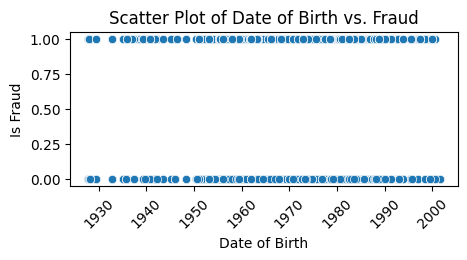

In [ ]:
# Create the scatter plot
plt.figure(figsize=(5, 2))
sns.scatterplot(x='dob', y='is_fraud', data=data)
plt.title('Scatter Plot of Date of Birth vs. Fraud')
plt.xlabel('Date of Birth')
plt.ylabel('Is Fraud')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Feature Enginering Usia

In [ ]:
data['usia'] = (data['trans_date_trans_time'] - data['dob']).dt.days // 365
data['usia'].describe()

count    14383.000000
mean        47.700063
std         17.232082
min         17.000000
25%         34.000000
50%         46.000000
75%         59.000000
max         93.000000
Name: usia, dtype: float64

Dapat dilihat bahwa **usia peminjam adalah 17 hingga 93 tahun.** Akan tetapi dapat dilihat juga bahwa **usia tidak memiliki kecenderungan** khusus dalam menentukan penipu atau bukan.

### Variabel Lokasi Toko (merchant)

In [ ]:
len(data['merchant'].unique())

693

In [ ]:
data['merchant'].value_counts().head(5)

merchant
Kilback LLC          58
Cormier LLC          48
Kutch and Sons       45
Rau and Sons         43
McDermott-Weimann    42
Name: count, dtype: int64

In [ ]:
grouped_data = data.groupby(['merchant', 'is_fraud'])['is_fraud'].count().unstack(fill_value=0)
grouped_data[(grouped_data[0] == 0)]

Empty DataFrame
Columns: [0, 1]
Index: []

In [ ]:
grouped_data = data.groupby(['merchant', 'is_fraud'])['is_fraud'].count().unstack(fill_value=0)
grouped_data[(grouped_data[1] == 0)]

is_fraud                           0  1
merchant                               
"Armstrong, Walter and Gottlieb"   9  0
"Bahringer, Osinski and Block"    15  0
"Becker, Harris and Harvey"       19  0
"Bins, Balistreri and Beatty"     27  0
"Boehm, Block and Jakubowski"     21  0
...                               .. ..
Wuckert-Goldne                    26  0
Wuckert-Walte                      8  0
Yost-Rogahn                       21  0
Zboncak LLC                       16  0
Zboncak Lt                        17  0

[184 rows x 2 columns]

Dari variabel lokasi toko pembelian didapatkan beberapa toko yang memiliki kredibilitas tinggi (asal transaksi bukan penipu). Terhitung ada 184 dari 693 toko.

### Variabel Jumlah Populasi (city_pop)

<ipython-input-266-55668f1bbe56>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['city_pop'], kde=True)


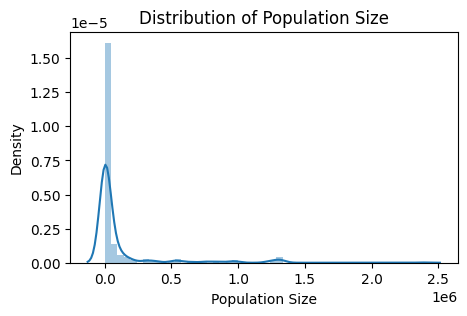

In [ ]:
plt.figure(figsize=(5, 3))
sns.distplot(data['city_pop'], kde=True)
plt.title('Distribution of Population Size')
plt.xlabel('Population Size')
plt.ylabel('Density')
plt.show()

### Variabel Koordinat (lat, long, lat_merch, long_merch)

#### Feature Enginering Jarak Pembeli dengan Toko

In [ ]:
#menghitung jarak lat dan long terhadap merch_lat dan merch_long
import math

# Fungsi untuk menghitung jarak antara dua titik koordinat dalam kilometer
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius Bumi dalam kilometer
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    return distance

# Menghitung jarak antara lokasi pembelian dan lokasi pedagang
data['jarak_km'] = data.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

# Menampilkan hasil
data

trans_date_trans_time                          merchant        category  \
0       2019-04-01 00:58:00  "Stokes, Christiansen and Sipes"     grocery_net   
1       2019-04-01 15:06:00                      Predovic Inc    shopping_net   
2       2019-04-01 22:37:00                   Wisozk and Sons        misc_pos   
3       2019-04-01 23:06:00                    Murray-Smitham     grocery_pos   
4       2019-04-01 23:59:00                        Friesen Lt  health_fitness   
...                     ...                               ...             ...   
14441   2019-01-22 00:37:00                      Hudson-Grady    shopping_pos   
14442   2019-01-22 00:41:00    "Nienow, Ankunding and Collie"        misc_pos   
14443   2019-01-22 00:42:00                  Pacocha-O'Reilly     grocery_pos   
14444   2019-01-22 00:48:00     "Bins, Balistreri and Beatty"    shopping_pos   
14445   2019-01-22 00:55:00                Daugherty-Thompson     food_dining   

          amt        city state      lat      long  city_pop  \
0       14.37       Wales    AK  64.7556 -165.6723       145   
1      966.11       Wales    AK  64.7556 -165.6723       145   
2       49.61       Wales    AK  64.7556 -165.6723       145   
3      295.26       Wales    AK  64.7556 -165.6723       145   
4       18.17       Wales    AK  64.7556 -165.6723       145   
...       ...         ...   ...      ...       ...       ...   
14441  122.00      Athena    OR  45.8289 -118.4971      1302   
14442    9.07    Gardiner    OR  43.7857 -124.1437       260   
14443  104.84        Alva    WY  44.6873 -104.4414       110   
14444  268.16       Wales    AK  64.7556 -165.6723       145   
14445   50.09  Unionville    MO  40.4815  -92.9951      3805   

                                     job  ... is_fraud  year  month  day hour  \
0             "Administrator, education"  ...        1  2019      4    1    0   
1             "Administrator, education"  ...        1  2019      4    1   15   
2             "Administrator, education"  ...        1  2019      4    1   22   
3             "Administrator, education"  ...        1  2019      4    1   23   
4             "Administrator, education"  ...        1  2019      4    1   23   
...                                  ...  ...      ...   ...    ...  ...  ...   
14441                             Dealer  ...        0  2019      1   22    0   
14442            "Engineer, maintenance"  ...        0  2019      1   22    0   
14443  "Administrator, local government"  ...        0  2019      1   22    0   
14444         "Administrator, education"  ...        0  2019      1   22    0   
14445     "Investment banker, corporate"  ...        0  2019      1   22    0   

       minute  second  day_of_week  usia    jarak_km  
0          58       0       Monday    79  109.285552  
1           6       0       Monday    79   79.856896  
2          37       0       Monday    79   66.807915  
3           6       0       Monday    79   39.636227  
4          59       0       Monday    79   77.611529  
...       ...     ...          ...   ...         ...  
14441      37       0      Tuesday    42   68.254405  
14442      41       0      Tuesday    63  120.058408  
14443      42       0      Tuesday    45   94.929969  
14444      48       0      Tuesday    79   75.744640  
14445      55       0      Tuesday    68   66.026003  

[14383 rows x 24 columns]

### Penyesuaian Tipe Data

#### Variabel is_fraud

In [ ]:
data['is_fraud'] = data['is_fraud'].astype(int)
data['is_fraud'].info()

<class 'pandas.core.series.Series'>
Index: 14383 entries, 0 to 14445
Series name: is_fraud
Non-Null Count  Dtype
--------------  -----
14383 non-null  int64
dtypes: int64(1)
memory usage: 224.7 KB


In [ ]:
 data

trans_date_trans_time                          merchant        category  \
0       2019-04-01 00:58:00  "Stokes, Christiansen and Sipes"     grocery_net   
1       2019-04-01 15:06:00                      Predovic Inc    shopping_net   
2       2019-04-01 22:37:00                   Wisozk and Sons        misc_pos   
3       2019-04-01 23:06:00                    Murray-Smitham     grocery_pos   
4       2019-04-01 23:59:00                        Friesen Lt  health_fitness   
...                     ...                               ...             ...   
14441   2019-01-22 00:37:00                      Hudson-Grady    shopping_pos   
14442   2019-01-22 00:41:00    "Nienow, Ankunding and Collie"        misc_pos   
14443   2019-01-22 00:42:00                  Pacocha-O'Reilly     grocery_pos   
14444   2019-01-22 00:48:00     "Bins, Balistreri and Beatty"    shopping_pos   
14445   2019-01-22 00:55:00                Daugherty-Thompson     food_dining   

          amt        city state      lat      long  city_pop  \
0       14.37       Wales    AK  64.7556 -165.6723       145   
1      966.11       Wales    AK  64.7556 -165.6723       145   
2       49.61       Wales    AK  64.7556 -165.6723       145   
3      295.26       Wales    AK  64.7556 -165.6723       145   
4       18.17       Wales    AK  64.7556 -165.6723       145   
...       ...         ...   ...      ...       ...       ...   
14441  122.00      Athena    OR  45.8289 -118.4971      1302   
14442    9.07    Gardiner    OR  43.7857 -124.1437       260   
14443  104.84        Alva    WY  44.6873 -104.4414       110   
14444  268.16       Wales    AK  64.7556 -165.6723       145   
14445   50.09  Unionville    MO  40.4815  -92.9951      3805   

                                     job  ... is_fraud  year  month  day  \
0             "Administrator, education"  ...        1  2019      4    1   
1             "Administrator, education"  ...        1  2019      4    1   
2             "Administrator, education"  ...        1  2019      4    1   
3             "Administrator, education"  ...        1  2019      4    1   
4             "Administrator, education"  ...        1  2019      4    1   
...                                  ...  ...      ...   ...    ...  ...   
14441                             Dealer  ...        0  2019      1   22   
14442            "Engineer, maintenance"  ...        0  2019      1   22   
14443  "Administrator, local government"  ...        0  2019      1   22   
14444         "Administrator, education"  ...        0  2019      1   22   
14445     "Investment banker, corporate"  ...        0  2019      1   22   

       hour  minute  second  day_of_week  usia    jarak_km  
0         0      58       0       Monday    79  109.285552  
1        15       6       0       Monday    79   79.856896  
2        22      37       0       Monday    79   66.807915  
3        23       6       0       Monday    79   39.636227  
4        23      59       0       Monday    79   77.611529  
...     ...     ...     ...          ...   ...         ...  
14441     0      37       0      Tuesday    42   68.254405  
14442     0      41       0      Tuesday    63  120.058408  
14443     0      42       0      Tuesday    45   94.929969  
14444     0      48       0      Tuesday    79   75.744640  
14445     0      55       0      Tuesday    68   66.026003  

[14383 rows x 24 columns]

## Prediksi Jumlah Tagihan Kartu Kredit



In [ ]:
b1 = data.copy()
#Menjadikan variabel trans_num sebagai index dari dataframe
b1.set_index('trans_num', inplace=True)
b1.head()

trans_date_trans_time  \
trans_num                                                
a3806e984cec6ac0096d8184c64ad3a1   2019-04-01 00:58:00   
a59185fe1b9ccf21323f581d7477573f   2019-04-01 15:06:00   
86ba3a888b42cd3925881fa34177b4e0   2019-04-01 22:37:00   
3a068fe1d856f0ecedbed33e4b5f4496   2019-04-01 23:06:00   
891cdd1191028759dc20dc224347a0ff   2019-04-01 23:59:00   

                                                          merchant  \
trans_num                                                            
a3806e984cec6ac0096d8184c64ad3a1  "Stokes, Christiansen and Sipes"   
a59185fe1b9ccf21323f581d7477573f                      Predovic Inc   
86ba3a888b42cd3925881fa34177b4e0                   Wisozk and Sons   
3a068fe1d856f0ecedbed33e4b5f4496                    Murray-Smitham   
891cdd1191028759dc20dc224347a0ff                        Friesen Lt   

                                        category     amt   city state  \
trans_num                                                               
a3806e984cec6ac0096d8184c64ad3a1     grocery_net   14.37  Wales    AK   
a59185fe1b9ccf21323f581d7477573f    shopping_net  966.11  Wales    AK   
86ba3a888b42cd3925881fa34177b4e0        misc_pos   49.61  Wales    AK   
3a068fe1d856f0ecedbed33e4b5f4496     grocery_pos  295.26  Wales    AK   
891cdd1191028759dc20dc224347a0ff  health_fitness   18.17  Wales    AK   

                                      lat      long  city_pop  \
trans_num                                                       
a3806e984cec6ac0096d8184c64ad3a1  64.7556 -165.6723       145   
a59185fe1b9ccf21323f581d7477573f  64.7556 -165.6723       145   
86ba3a888b42cd3925881fa34177b4e0  64.7556 -165.6723       145   
3a068fe1d856f0ecedbed33e4b5f4496  64.7556 -165.6723       145   
891cdd1191028759dc20dc224347a0ff  64.7556 -165.6723       145   

                                                         job  ... is_fraud  \
trans_num                                                     ...            
a3806e984cec6ac0096d8184c64ad3a1  "Administrator, education"  ...        1   
a59185fe1b9ccf21323f581d7477573f  "Administrator, education"  ...        1   
86ba3a888b42cd3925881fa34177b4e0  "Administrator, education"  ...        1   
3a068fe1d856f0ecedbed33e4b5f4496  "Administrator, education"  ...        1   
891cdd1191028759dc20dc224347a0ff  "Administrator, education"  ...        1   

                                  year  month  day  hour  minute  second  \
trans_num                                                                  
a3806e984cec6ac0096d8184c64ad3a1  2019      4    1     0      58       0   
a59185fe1b9ccf21323f581d7477573f  2019      4    1    15       6       0   
86ba3a888b42cd3925881fa34177b4e0  2019      4    1    22      37       0   
3a068fe1d856f0ecedbed33e4b5f4496  2019      4    1    23       6       0   
891cdd1191028759dc20dc224347a0ff  2019      4    1    23      59       0   

                                  day_of_week  usia    jarak_km  
trans_num                                                        
a3806e984cec6ac0096d8184c64ad3a1       Monday    79  109.285552  
a59185fe1b9ccf21323f581d7477573f       Monday    79   79.856896  
86ba3a888b42cd3925881fa34177b4e0       Monday    79   66.807915  
3a068fe1d856f0ecedbed33e4b5f4496       Monday    79   39.636227  
891cdd1191028759dc20dc224347a0ff       Monday    79   77.611529  

[5 rows x 23 columns]

Pemilihan fitur dan target.

In [ ]:
features = ['merchant', 'category', 'city', 'state', 'city_pop', 'job', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'day_of_week', 'usia', 'jarak_km']

X = b1[features]
y = b1['amt']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['category', 'state', 'city', 'job', 'day_of_week', 'merchant']).astype(int)

###Analisis Regresi Berganda

Berhubung tanggal transaksi memiliki interval yang tidak beraturan, sulit untuk menerapkan metode konvensional *time series analysis*. Oleh karena itu, penulis memilih untuk menggunakan metode sederhana berupa **analisis regresi berganda.** Metode ini memiliki beberapa asumsi yang perlu dipenuhi agar dapat digunakan dalam analisis. Asumsi yang perlu dipenuhi sebagai berikut.

1.   Variabel dependen berdistribusi normal.
2.   Terdapat hubungan linearitas antara variabel dependen dan variabel independen.



####Uji Asumsi Variabel Dependen Berdistribusi Normal


Uji normalitas yang digunakan untuk menguji asumsi kenormalan adalah uji Kolmogorov-Smirnov.

- Hipotesis Uji:
  - $H_0$: Data variabel dependen berdistribusi normal
  - $H_1$: Data variabel dependen tidak berdistribusi normal
- Tingkat Signifikansi:
  - $\alpha$ = 5\%
- Statistik Uji:
  - $p$-*value* pada keluaran `ks.test()`.
- Kriteria Uji:
  - $H_0$ ditolak jika $p$-*value* < $α$.

<Axes: ylabel='amt'>

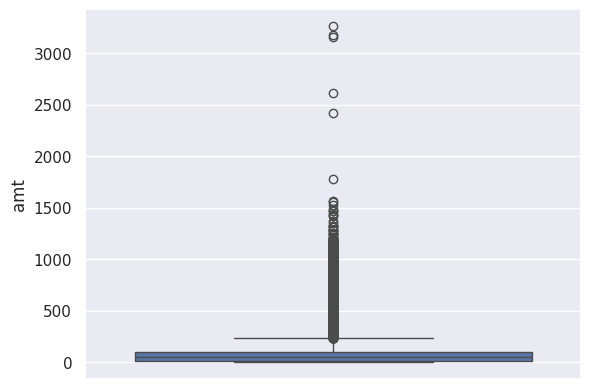

In [ ]:
sns.boxplot(y)

In [ ]:
from scipy.stats import kstest

stat, p_value = kstest(y, 'norm', args=(y.mean(), y.std()))
print(f'Kolmogorov-Smirnov Test:')
print(f'Statistik = {stat}, p-value = {p_value}')
if p_value > 0.05:
    print("Variabel Dependen terdistribusi normal (gagal tolak hipotesis normalitas)")
else:
    print("Variabel Dependen tidak terdistribusi normal (tolak hipotesis normalitas)")

Kolmogorov-Smirnov Test:
Statistik = 0.2991340254209005, p-value = 0.0
Variabel Dependen tidak terdistribusi normal (tolak hipotesis normalitas)


Penanganan dengan menggunakan transformasi sqrt

In [ ]:
#Transformasi data y menggunakan sqrt
y_sqrt = np.sqrt(y)
from scipy.stats import kstest

stat, p_value = kstest(y_sqrt, 'norm', args=(y_sqrt.mean(), y_sqrt.std()))
print(f'Kolmogorov-Smirnov Test:')
print(f'Statistik = {stat}, p-value = {p_value}')
if p_value > 0.05:
    print("Variabel Dependen terdistribusi normal (gagal tolak hipotesis normalitas)")
else:
    print("Variabel Dependen tidak terdistribusi normal (tolak hipotesis normalitas)")

Kolmogorov-Smirnov Test:
Statistik = 0.16810652240405732, p-value = 0.0
Variabel Dependen tidak terdistribusi normal (tolak hipotesis normalitas)


Penanganan dengan menggunakan transformasi logaritma

In [ ]:
#Transformasi data y menggunakan log
y_log = np.log(y)

In [ ]:
from scipy.stats import kstest

stat, p_value = kstest(y_log, 'norm', args=(y_log.mean(), y_log.std()))
print(f'Kolmogorov-Smirnov Test:')
print(f'Statistik = {stat}, p-value = {p_value}')
if p_value > 0.05:
    print("Variabel Dependen terdistribusi normal (gagal tolak hipotesis normalitas)")
else:
    print("Variabel Dependen tidak terdistribusi normal (tolak hipotesis normalitas)")

Kolmogorov-Smirnov Test:
Statistik = 0.07272137884135371, p-value = 1.3664138104582248e-66
Variabel Dependen tidak terdistribusi normal (tolak hipotesis normalitas)


Penanganan dengan menghapus *outlier*

In [ ]:
#Menghitung IQR dari data y kolom amt
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (3 * IQR)
upperend = Q3 + (3 * IQR)

In [ ]:
#Menghapus outlier
yout = y[(y > lowerend) & (y < upperend)]

In [ ]:
from scipy.stats import kstest

stat, p_value = kstest(yout, 'norm', args=(yout.mean(), yout.std()))
print(f'Kolmogorov-Smirnov Test:')
print(f'Statistik = {stat}, p-value = {p_value}')
if p_value > 0.05:
    print("Variabel Dependen terdistribusi normal (gagal tolak hipotesis normalitas)")
else:
    print("Variabel Dependen tidak terdistribusi normal (tolak hipotesis normalitas)")

Kolmogorov-Smirnov Test:
Statistik = 0.18822459235581296, p-value = 0.0
Variabel Dependen tidak terdistribusi normal (tolak hipotesis normalitas)


Penanganan dengan menghapus outlier lalu transformasi logaritma

In [ ]:
yout_sqrt = np.sqrt(yout)
from scipy.stats import kstest

stat, p_value = kstest(yout_sqrt, 'norm', args=(yout_sqrt.mean(), yout_sqrt.std()))
print(f'Kolmogorov-Smirnov Test:')
print(f'Statistik = {stat}, p-value = {p_value}')
if p_value > 0.05:
    print("Variabel Dependen terdistribusi normal (gagal tolak hipotesis normalitas)")
else:
    print("Variabel Dependen tidak terdistribusi normal (tolak hipotesis normalitas)")

Kolmogorov-Smirnov Test:
Statistik = 0.07460553829974215, p-value = 7.702056731610923e-65
Variabel Dependen tidak terdistribusi normal (tolak hipotesis normalitas)


Setelah melakukan beberapa penanganan terhadap data, diperoleh bahwa data **variabel dependen tidak berdistribusi normal.** Oleh karena itu, penulis menggunakan metode lain untuk melakukan analisis prediksi.

###Long Short-Term Memory (LSTM) Multivariate

####Pemilihan Variabel

Dalam pemodelan prediksi, akan dilakukan beberapa penghapusan variabel (drop variabel), sehingga variabel yang tersisa/digunakan adalah:

1. **amt** : variabel target.
2. **city_pop** : menyatakan populasi kota.
3. **jarak_km** : menyatakan jarak pembeli dengan *merchant*. Variabel ini sekaligus mewakili variabel lat, long, merchant_lat, dan merchant_long.
4. **category** : menyatakan kategori barang pembelian.
5. **state** : menyatakan *state* dari lokasi pembeli, sekaligus mewakili variabel lat dan long
6. **city** : menyatakan *city* dari lokasi pembeli, sekaligus mewakili variabel lat dan long
7. **job** : menyatakan jenis pekerjaan pembeli.
8. **merchant** :menyatakan nama merchant, sekaligus mewakili variabel lokasi merchant_lat dan merchant_long.

Penulis memutuskan untuk tetap menggunakan data kategorik pada model prediksi ini. Artinya, akan dilakukan penanganan terhadap data kategorik tersebut agar dapat digunakan dalam model.

In [ ]:
b1 = data.copy()

In [ ]:
#Hapus kolom year, month, day, hour, minute, dob, trans_num, is_fraud dan second
b1.drop(['lat', 'long', 'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dob', 'trans_num', 'is_fraud', 'second', 'day_of_week', 'usia',], axis=1, inplace=True)

####Pembagian Data Train dan Data Test

Karena kasus ini adalah *time series*, kita tidak dapat membagi data secara acak. Kita harus tetap mempertahankan urutan (time series split). Data leakage akan terjadi jika kita menggunakan data masa depan untuk memprediksi data pada masa lalu.

Dalam kasus ini, data train diambil dari **70% data awal**, sedangkan data test merupakan **30% dari data terakhir**.

In [ ]:
def train_val_split(time, series, time_step=None):
    if time_step is None:
        time_step = int(len(series) * 0.7)
    b1_train = series[:time_step]
    b1_test = series[time_step:]
    return b1_train, b1_test
#Split dataset menggunakan fungsi di atas dengan menggunakan semua variabel pada b1
b1_train, b1_test = train_val_split(b1['trans_date_trans_time'], b1)

In [ ]:
#Jadikan trans_date sebagai index pada b1_train dan b1_test
b1_train.set_index('trans_date_trans_time', inplace=True)
b1_test.set_index('trans_date_trans_time', inplace=True)

####Transformasi Data Kateogrik

Data kategorik diubah menjadi data numerik agar dapat digunakan dalam pemodelan

In [ ]:
for col in ['merchant', 'category', 'city', 'state', 'job']:
    mapping = {value: index for index, value in enumerate(b1_train[col].unique())}
    b1_train[col] = b1_train[col].map(mapping)
    b1_test[col] = b1_test[col].map(mapping)

<ipython-input-359-92b7e186c0cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b1_train[col] = b1_train[col].map(mapping)
<ipython-input-359-92b7e186c0cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b1_test[col] = b1_test[col].map(mapping)
<ipython-input-359-92b7e186c0cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

####Plot Data Numerik

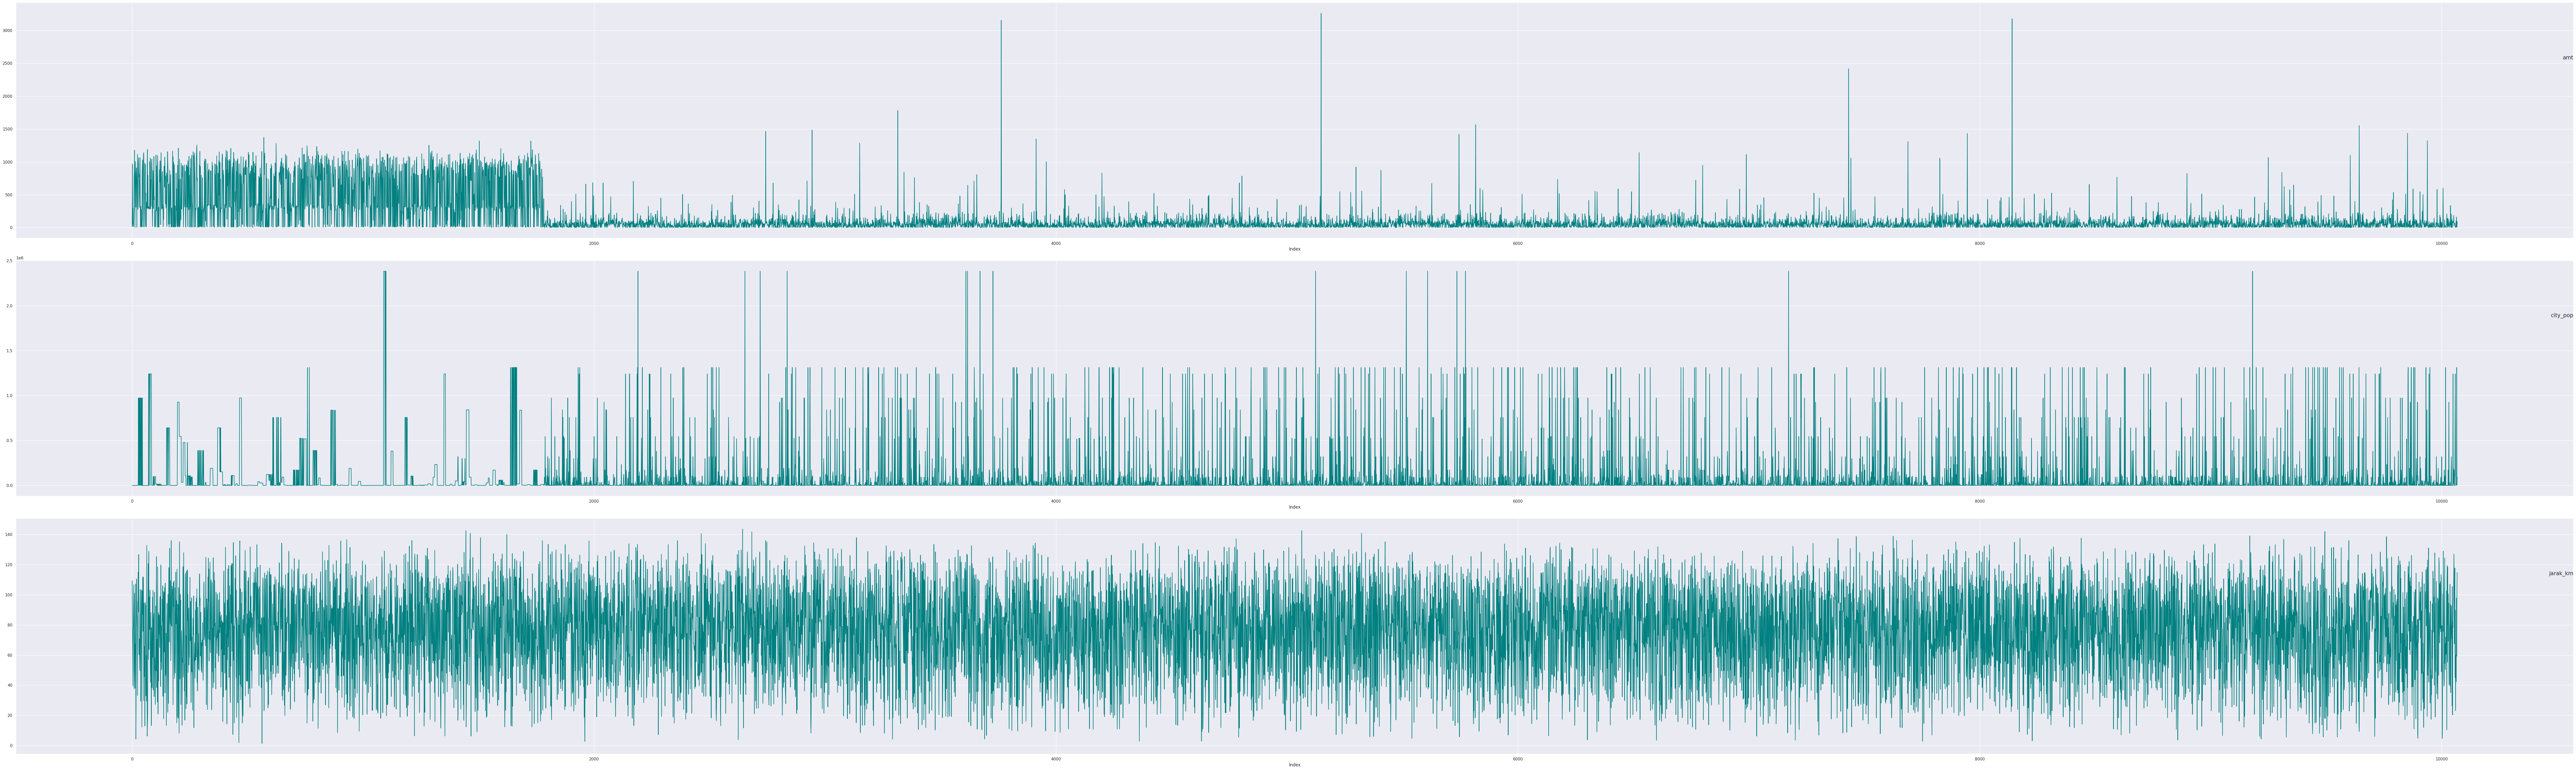

In [ ]:
values = b1_train.values
# Variabel numerik
groups = [2, 5, 7]
i = 1

# Plot
plt.figure(figsize=(100, 30))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], color="teal")
    plt.xlabel('Index')
    plt.title(b1_train.columns[group], y=0.75, loc='right', fontsize=15)
    i += 1

plt.tight_layout()
plt.show()

**Interpretasi:**

Plot pertama atau data **'amt'** menunjukkan fluktuasi yang relatif lebih jarang dibandingkan dua plot lainnya. Terdapat beberapa puncak yang signifikan, tetapi secara umum nilai tetap rendah di sebagian besar waktu. Hal ini menunjukkan adanya periode aktivitas yang lebih jarang, dengan beberapa lonjakan yang sesekali terjadi. Hal ini bisa mengindikasikan data terdapat aktivitas musiman.

Plot kedua atau data **'city_pop'** menunjukkan fluktuasi yang lebih sering dan intens dibandingkan dengan plot pertama. Di sini terlihat lebih banyak puncak dengan frekuensi yang lebih rapat. Hal ini menunjukkan adanya aktivitas yang lebih sering dan fluktuasi yang lebih signifikan.

Plot ketiga atau data **'jarak_km'** memperlihatkan pola yang sangat padat dengan fluktuasi yang terus-menerus. Di sini tidak ada jeda yang jelas, dan data tampak berfluktuasi secara konstan. Hal ini dapat mengindikasikan aktivitas yang terus-menerus atau terdapat pola musiman yang jelas.

####Normalisasi Data

Normalisasi bertujuan untuk mengubah data agar berada dalam rentang 0 hingga 1. Normalisasi data berguna untuk mengurangi skala yang berbeda antar fitur, sehingga model yang sensitif terhadap skala fitur dapat mempelajari pola dengan lebih baik dan lebih cepat dalam konvergensi saat pelatihan.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to scale
columns = (['merchant', 'category', 'city', 'state', 'job', 'amt', 'city_pop', 'jarak_km'])

# Scale the selected columns to the range 0-1
b1_train[columns] = scaler.fit_transform(b1_train[columns])
b1_test[columns] = scaler.transform(b1_test[columns])

<ipython-input-362-5670256f87bc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b1_train[columns] = scaler.fit_transform(b1_train[columns])
<ipython-input-362-5670256f87bc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b1_test[columns] = scaler.transform(b1_test[columns])


####Persiapan Data *Time Series*

Penulis mempersiapkan data train dan data test untuk model time series. Data dipecah menggunakan pendekatan *sliding window* dengan menggunakan data historis sepanjang 100 timesteps (n_past) sebagai input (X) untuk memprediksi nilai target 1 timestep ke depan (n_future). Hasilnya, data yang dipersiapkan (X_train, y_train, X_test, y_test) siap digunakan dalam model.

In [ ]:
# kolom target dan fitur
target_column = 'amt'
feature_columns = ['merchant', 'category', 'city', 'state', 'city_pop', 'job', 'jarak_km']

# Menentukan indeks kolom
target_idx_train = b1_train.columns.get_loc(target_column)
feature_idx_train = [b1_train.columns.get_loc(col) for col in feature_columns]
target_idx_test = b1_test.columns.get_loc(target_column)
feature_idx_test = [b1_test.columns.get_loc(col) for col in feature_columns]

#Ubah ke array
b1_train = np.array(b1_train)
b1_test = np.array(b1_test)

#Train Sets
X = []
y = []
n_future = 1
n_past = 100

for i in range(n_past, len(b1_train) - n_future+1):
    X.append(b1_train[i - n_past:i, feature_idx_train])
    y.append(b1_train[i + n_future - 1:i + n_future, target_idx_train])
X_train, y_train = np.array(X), np.array(y)

#Test Sets
X = []
y = []
for i in range(n_past, len(b1_test) - n_future+1):
    X.append(b1_test[i - n_past:i, feature_idx_test])
    y.append(b1_test[i + n_future - 1:i + n_future, target_idx_test])
X_test, y_test = np.array(X), np.array(y)

print('X_train shape : {}   y_train shape : {} \n'
      'X_test shape : {}      y_test shape : {} '.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train shape : (9968, 100, 7)   y_train shape : (9968, 1) 
X_test shape : (4215, 100, 7)      y_test shape : (4215, 1) 


####Pemodelan LSTM

Model LSTM terdiri dari beberapa lapisan LSTM.
1. Lapisan pertama menggunakan 32 unit dengan output urutan penuh (return_sequences=True)
2. Lapisan kedua menggunakan 16 unit dengan output satu nilai.
3. Lapisan Dense ditambahkan untuk menghasilkan prediksi.

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(y_train.shape[1]))

# Compile the model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

# Define callbacks for avoiding overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 32)             │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,273 (32.32 KB)

 Trainable params: 8,273 (32.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping, checkpoint], shuffle=False)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - loss: 0.0093 - root_mean_squared_error: 0.0935 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0378
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - loss: 0.0097 - root_mean_squared_error: 0.0952 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0377
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - loss: 0.0098 - root_mean_squared_error: 0.0958 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0377
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - loss: 0.0104 - root_mean_squared_error: 0.0988 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0378
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 35s 80ms/step - loss: 0.0099 - root_mean_squared_error: 0.0967 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0378
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 51s 117ms/step - loss: 0.0109 - root_mean_squared_error: 0.1006 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0378
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━

####*Best Model*

In [ ]:
best_model = load_model('best_model.keras')

In [ ]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 32)             │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,821 (96.96 KB)

 Trainable params: 8,273 (32.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,548 (64.64 KB)

In [ ]:
test_predictions = best_model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions': test_predictions,
                                  'Actual':y_test.flatten()})
test_results.head()

132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


Train Predictions    Actual
0           0.023257  0.000248
1           0.023260  0.000018
2           0.023521  0.039056
3           0.023193  0.005511
4           0.022743  0.014676

####Visualisasi dan Evaluasi

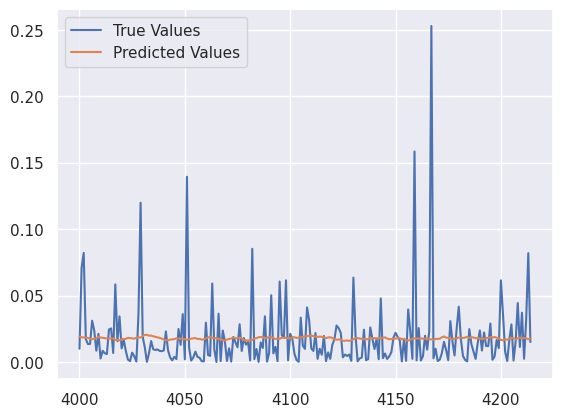

In [ ]:
plt.plot(test_results['Actual'][4000:], label='True Values')
plt.plot(test_results['Train Predictions'][4000:], label='Predicted Values')
plt.legend()
plt.show()

**Interpretasi:**
Grafik di atas memperlihatkan perbandingan antara nilai sebenarnya dan nilai prediksi model. Terlihat bahwa garis prediksi hampir mendatar dan gagal mengikuti pola fluktuasi pada nilai sebenarnya, terutama pada puncak-puncak nilai yang signifikan. Hal ini mengindikasikan bahwa model mungkin mengalami kesulitan dalam menangkap variabilitas data, yang dapat menunjukkan adanya underfitting atau model yang kurang kompleks untuk data ini.

In [ ]:
from math import sqrt
rmse = sqrt(mse(y_test, test_predictions))
print('Test RMSE: %.5f' % rmse)

Test RMSE: 0.03209


Nilai Test RMSE: 0.03209 menunjukkan bahwa rata-rata kesalahan prediksi model terhadap nilai sebenarnya pada data uji adalah sekitar 0.03209 dalam satuan data aslinya. **RMSE yang rendah**, seperti nilai 0.03209 ini, umumnya menandakan bahwa model memiliki **akurasi yang cukup baik**, dengan rata-rata perbedaan antara prediksi dan nilai aktual yang kecil.







## Model Clustering



####Pemilihan Variabel

Dalam kasus ini variabel yang digunakan sudah ditentukan, yaitu 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'jarak_km'.

Penulis memutuskan menggunakan variabel **'jarak_km'** karena dapat mewakili variabel lat, long, merch_lat, merch_long.

In [ ]:
b2 = data.copy()
b2.reset_index(drop=True, inplace=True)

In [ ]:
#Mengambil kolom amt, lat, long, city_pop, merch_lat, merch_long
b2 = b2[['trans_num', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'jarak_km']]
b2

trans_num     amt      lat      long  city_pop  \
0      a3806e984cec6ac0096d8184c64ad3a1   14.37  64.7556 -165.6723       145   
1      a59185fe1b9ccf21323f581d7477573f  966.11  64.7556 -165.6723       145   
2      86ba3a888b42cd3925881fa34177b4e0   49.61  64.7556 -165.6723       145   
3      3a068fe1d856f0ecedbed33e4b5f4496  295.26  64.7556 -165.6723       145   
4      891cdd1191028759dc20dc224347a0ff   18.17  64.7556 -165.6723       145   
...                                 ...     ...      ...       ...       ...   
14378  699a4c06b22711bf3e0d8ef91232d356  122.00  45.8289 -118.4971      1302   
14379  080d620d24815c7d6c637cf0b71dde8e    9.07  43.7857 -124.1437       260   
14380  3c346c8cd627c5fe3ed57430db2e9ae7  104.84  44.6873 -104.4414       110   
14381  e66ffcc95ba7fc490486242af1205d04  268.16  64.7556 -165.6723       145   
14382  65e7370f473f9b9d75796c8033a7c929   50.09  40.4815  -92.9951      3805   

       merch_lat  merch_long    jarak_km  
0      65.654142 -164.722603  109.285552  
1      65.468863 -165.473127   79.856896  
2      65.347667 -165.914542   66.807915  
3      64.445035 -166.080207   39.636227  
4      65.447094 -165.446843   77.611529  
...          ...         ...         ...  
14378  46.442439 -118.524214   68.254405  
14379  42.901265 -124.995317  120.058408  
14380  45.538062 -104.542117   94.929969  
14381  64.081462 -165.898698   75.744640  
14382  40.387243  -92.224871   66.026003  

[14383 rows x 8 columns]

In [ ]:
#Menjadikan variabel trans_num sebagai index dari dataframe
b2.set_index('trans_num', inplace=True)
b2

amt      lat      long  city_pop  \
trans_num                                                               
a3806e984cec6ac0096d8184c64ad3a1   14.37  64.7556 -165.6723       145   
a59185fe1b9ccf21323f581d7477573f  966.11  64.7556 -165.6723       145   
86ba3a888b42cd3925881fa34177b4e0   49.61  64.7556 -165.6723       145   
3a068fe1d856f0ecedbed33e4b5f4496  295.26  64.7556 -165.6723       145   
891cdd1191028759dc20dc224347a0ff   18.17  64.7556 -165.6723       145   
...                                  ...      ...       ...       ...   
699a4c06b22711bf3e0d8ef91232d356  122.00  45.8289 -118.4971      1302   
080d620d24815c7d6c637cf0b71dde8e    9.07  43.7857 -124.1437       260   
3c346c8cd627c5fe3ed57430db2e9ae7  104.84  44.6873 -104.4414       110   
e66ffcc95ba7fc490486242af1205d04  268.16  64.7556 -165.6723       145   
65e7370f473f9b9d75796c8033a7c929   50.09  40.4815  -92.9951      3805   

                                  merch_lat  merch_long    jarak_km  
trans_num                                                            
a3806e984cec6ac0096d8184c64ad3a1  65.654142 -164.722603  109.285552  
a59185fe1b9ccf21323f581d7477573f  65.468863 -165.473127   79.856896  
86ba3a888b42cd3925881fa34177b4e0  65.347667 -165.914542   66.807915  
3a068fe1d856f0ecedbed33e4b5f4496  64.445035 -166.080207   39.636227  
891cdd1191028759dc20dc224347a0ff  65.447094 -165.446843   77.611529  
...                                     ...         ...         ...  
699a4c06b22711bf3e0d8ef91232d356  46.442439 -118.524214   68.254405  
080d620d24815c7d6c637cf0b71dde8e  42.901265 -124.995317  120.058408  
3c346c8cd627c5fe3ed57430db2e9ae7  45.538062 -104.542117   94.929969  
e66ffcc95ba7fc490486242af1205d04  64.081462 -165.898698   75.744640  
65e7370f473f9b9d75796c8033a7c929  40.387243  -92.224871   66.026003  

[14383 rows x 7 columns]

In [ ]:
klaster = b2.copy()

####Standarisasi Fitur

In [ ]:
#Melakukan scaling pada fitur "amt", "city_pop", dan 'jarak_km'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
klaster[['amt', 'city_pop', 'jarak_km']] = scaler.fit_transform(b2[['amt', 'city_pop', 'jarak_km']])
klaster

amt      lat      long  city_pop  \
trans_num                                                                 
a3806e984cec6ac0096d8184c64ad3a1 -0.473406  64.7556 -165.6723 -0.366327   
a59185fe1b9ccf21323f581d7477573f  3.685004  64.7556 -165.6723 -0.366327   
86ba3a888b42cd3925881fa34177b4e0 -0.319433  64.7556 -165.6723 -0.366327   
3a068fe1d856f0ecedbed33e4b5f4496  0.753878  64.7556 -165.6723 -0.366327   
891cdd1191028759dc20dc224347a0ff -0.456803  64.7556 -165.6723 -0.366327   
...                                    ...      ...       ...       ...   
699a4c06b22711bf3e0d8ef91232d356 -0.003142  45.8289 -118.4971 -0.362338   
080d620d24815c7d6c637cf0b71dde8e -0.496564  43.7857 -124.1437 -0.365930   
3c346c8cd627c5fe3ed57430db2e9ae7 -0.078119  44.6873 -104.4414 -0.366447   
e66ffcc95ba7fc490486242af1205d04  0.635471  64.7556 -165.6723 -0.366327   
65e7370f473f9b9d75796c8033a7c929 -0.317336  40.4815  -92.9951 -0.353708   

                                  merch_lat  merch_long  jarak_km  
trans_num                                                          
a3806e984cec6ac0096d8184c64ad3a1  65.654142 -164.722603  1.164919  
a59185fe1b9ccf21323f581d7477573f  65.468863 -165.473127  0.140010  
86ba3a888b42cd3925881fa34177b4e0  65.347667 -165.914542 -0.314446  
3a068fe1d856f0ecedbed33e4b5f4496  64.445035 -166.080207 -1.260751  
891cdd1191028759dc20dc224347a0ff  65.447094 -165.446843  0.061811  
...                                     ...         ...       ...  
699a4c06b22711bf3e0d8ef91232d356  46.442439 -118.524214 -0.264069  
080d620d24815c7d6c637cf0b71dde8e  42.901265 -124.995317  1.540104  
3c346c8cd627c5fe3ed57430db2e9ae7  45.538062 -104.542117  0.664959  
e66ffcc95ba7fc490486242af1205d04  64.081462 -165.898698 -0.003207  
65e7370f473f9b9d75796c8033a7c929  40.387243  -92.224871 -0.341677  

[14383 rows x 7 columns]

In [ ]:
!pip install scikit-fuzzy

####Pemodelan

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, Birch, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import skfuzzy as fuzz

np.random.seed(24)
# Define clustering models
models = {
    'K-Means': KMeans(n_clusters=3, random_state=24),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'BIRCH': Birch(n_clusters=3),
    'Mean-Shift': MeanShift(),
    'Agglomerative Hierarchical': AgglomerativeClustering(n_clusters=3),
}

# Store evaluation results
evaluation_results = {}

# Evaluate each model
for model_name, model in models.items():
    if model_name == 'DBSCAN':  # Density-based models
        labels = model.fit_predict(klaster)
    elif model_name == 'Gaussian Mixture':  # Distribution-based model
        labels = model.fit_predict(klaster)
    else:  # Centroid-based and hierarchical models
        labels = model.fit_predict(klaster)

    # Check if clustering has more than 1 cluster for valid silhouette score
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(klaster, labels)
        calinski_harabasz = calinski_harabasz_score(klaster, labels)
        davies_bouldin = davies_bouldin_score(klaster, labels)
    else:
        silhouette_avg, calinski_harabasz, davies_bouldin = None, None, None

    # Store results
    evaluation_results[model_name] = {
        'Silhouette Score': silhouette_avg,
        'Calinski-Harabasz Score': calinski_harabasz,
        'Davies-Bouldin Score': davies_bouldin
    }

# Fuzzy C-Means Clustering
n_clusters = 3
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(klaster.T, n_clusters, 2, error=0.005, maxiter=1000)
fuzzy_labels = np.argmax(u, axis=0)
fuzzy_silhouette = silhouette_score(klaster, fuzzy_labels)
fuzzy_calinski_harabasz = calinski_harabasz_score(klaster, fuzzy_labels)
fuzzy_davies_bouldin = davies_bouldin_score(klaster, fuzzy_labels)

# Add Fuzzy C-Means to evaluation results
evaluation_results['Fuzzy C-Means'] = {
    'Silhouette Score': fuzzy_silhouette,
    'Calinski-Harabasz Score': fuzzy_calinski_harabasz,
    'Davies-Bouldin Score': fuzzy_davies_bouldin
}

####Metrik Evaluasi

In [ ]:
df_evaluation_results = pd.DataFrame(evaluation_results).T.reset_index()
df_evaluation_results.columns = ['Model', 'Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']
df_evaluation_results

Model  Silhouette Score  Calinski-Harabasz Score  \
0                     K-Means          0.712531              3389.772395   
1                      DBSCAN         -0.264464                66.513934   
2                       BIRCH          0.527959             16621.099674   
3                  Mean-Shift          0.315024             12552.298947   
4  Agglomerative Hierarchical          0.523496             16017.665348   
5               Fuzzy C-Means          0.458146             13838.951804   

   Davies-Bouldin Score  
0              0.253053  
1              1.739095  
2              0.728204  
3              0.550566  
4              0.726783  
5              0.815804

####Best Model

In [ ]:
best_model = KMeans(n_clusters=3, random_state=24)

# Melatih model terbaik dengan data klaster dan mendapatkan label kluster
labels = best_model.fit_predict(klaster)

In [ ]:
# Menambahkan kolom "cluster" pada DataFrame awal sebelum dilakukan scale
b2['cluster'] = labels
b2

amt      lat      long  city_pop  \
trans_num                                                               
a3806e984cec6ac0096d8184c64ad3a1   14.37  64.7556 -165.6723       145   
a59185fe1b9ccf21323f581d7477573f  966.11  64.7556 -165.6723       145   
86ba3a888b42cd3925881fa34177b4e0   49.61  64.7556 -165.6723       145   
3a068fe1d856f0ecedbed33e4b5f4496  295.26  64.7556 -165.6723       145   
891cdd1191028759dc20dc224347a0ff   18.17  64.7556 -165.6723       145   
...                                  ...      ...       ...       ...   
699a4c06b22711bf3e0d8ef91232d356  122.00  45.8289 -118.4971      1302   
080d620d24815c7d6c637cf0b71dde8e    9.07  43.7857 -124.1437       260   
3c346c8cd627c5fe3ed57430db2e9ae7  104.84  44.6873 -104.4414       110   
e66ffcc95ba7fc490486242af1205d04  268.16  64.7556 -165.6723       145   
65e7370f473f9b9d75796c8033a7c929   50.09  40.4815  -92.9951      3805   

                                  merch_lat  merch_long    jarak_km  cluster  
trans_num                                                                     
a3806e984cec6ac0096d8184c64ad3a1  65.654142 -164.722603  109.285552        2  
a59185fe1b9ccf21323f581d7477573f  65.468863 -165.473127   79.856896        2  
86ba3a888b42cd3925881fa34177b4e0  65.347667 -165.914542   66.807915        2  
3a068fe1d856f0ecedbed33e4b5f4496  64.445035 -166.080207   39.636227        2  
891cdd1191028759dc20dc224347a0ff  65.447094 -165.446843   77.611529        2  
...                                     ...         ...         ...      ...  
699a4c06b22711bf3e0d8ef91232d356  46.442439 -118.524214   68.254405        1  
080d620d24815c7d6c637cf0b71dde8e  42.901265 -124.995317  120.058408        1  
3c346c8cd627c5fe3ed57430db2e9ae7  45.538062 -104.542117   94.929969        1  
e66ffcc95ba7fc490486242af1205d04  64.081462 -165.898698   75.744640        2  
65e7370f473f9b9d75796c8033a7c929  40.387243  -92.224871   66.026003        1  

[14383 rows x 8 columns]

####Karakteristik Cluster

In [ ]:
b2['cluster'].value_counts()

cluster
1    14067
0      172
2      144
Name: count, dtype: int64

In [ ]:
#Menampilkan dataframe secara keseluruhan
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
charac = b2.groupby('cluster').describe()
charac

amt                                                         \
           count        mean         std   min     25%     50%      75%   
cluster                                                                   
0          172.0   99.543547  220.279596  1.35   6.755  32.425   72.745   
1        14067.0  122.247595  226.652008  1.00  12.185  51.760  100.285   
2          144.0  196.457986  389.079667  1.12  12.890  42.980  154.610   

                      lat                                                  \
             max    count       mean       std      min      25%      50%   
cluster                                                                     
0        1110.42    172.0  20.047465  0.026866  20.0271  20.0271  20.0271   
1        3261.47  14067.0  39.742718  4.123561  32.2740  36.7651  39.6662   
2        3178.51    144.0  65.150650  0.614555  64.7556  64.7556  64.7556   

                              long                                             \
             75%      max    count        mean        std       min       25%   
cluster                                                                         
0        20.0827  20.0827    172.0 -155.413031   0.057162 -155.4880 -155.4880   
1        41.7100  55.4732  14067.0 -109.762953  10.803545 -133.1171 -119.0825   
2        65.6899  66.6933    144.0 -162.354033   4.744275 -165.6723 -165.6723   

                                      city_pop                                \
              50%       75%       max    count           mean            std   
cluster                                                                        
0       -155.3697 -155.3697 -155.3697    172.0    2730.953488    1637.060187   
1       -111.0292  -99.3844  -89.6287  14067.0  108746.829886  292853.050973   
2       -165.6723 -156.2920 -153.9940    144.0     185.833333      58.727533   

                                                    merch_lat             \
            min     25%     50%      75%        max     count       mean   
cluster                                                                    
0        1490.0  1490.0  1490.0   4878.0     4878.0     172.0  19.982711   
1          46.0   509.0  1661.0  42384.0  2383912.0   14067.0  39.743029   
2         145.0   145.0   145.0    248.5      277.0     144.0  65.216003   

                                                                          \
              std        min        25%        50%        75%        max   
cluster                                                                    
0        0.568907  19.032689  19.480787  19.971862  20.464441  21.043845   
1        4.170380  31.358385  36.907587  39.623349  42.214529  56.214113   
2        0.865208  63.794716  64.561854  65.129187  65.654282  67.510267   

        merch_long                                                             \
             count        mean        std         min         25%         50%   
cluster                                                                         
0            172.0 -155.411425   0.553443 -156.480766 -155.858839 -155.355593   
1          14067.0 -109.763491  10.814285 -134.017711 -119.415925 -110.818452   
2            144.0 -162.382430   4.704379 -166.670685 -165.902659 -165.098823   

                                jarak_km                                  \
                75%         max    count       mean        std       min   
cluster                                                                    
0       -154.986342 -154.417560    172.0  80.285037  30.759382  1.431535   
1        -99.902309  -88.646366  14067.0  75.914778  28.659472  0.639325   
2       -156.758228 -153.069184    144.0  62.898589  28.421907  4.382820   

                                                       
               25%        50%         75%         max  
cluster                                                
0        58.899166  85.001380  102.278462  142.484909  
1        55.600270  78.056518   97.734737  143.55

**Interpretasi:**

1. Cluster 0 memiliki jumlah transaksi yang kecil dan pelanggan yang tersebar dalam populasi kota rendah. Jarak ke merchant cukup besar, sehingga akses mungkin terbatas. Perusahaan dapat mempertimbangkan untuk menambah merchant atau fasilitas di area ini.
2. Cluster 1 menyumbang sebagian besar data, berlokasi di daerah padat penduduk. Jarak ke merchant juga relatif jauh, tetapi area ini memiliki potensi pelanggan terbesar, sehingga memperkuat layanan di sini akan berkontribusi besar terhadap peningkatan pelanggan.
3. Cluster 2 menunjukkan jumlah pelanggan dan populasi kota yang kecil. Jarak ke merchant cukup jauh, tapi lebih pendek dari klaster lainnya. Fokus pemasaran tambahan dapat dilakukan untuk memperluas akses pelanggan di area ini.

####Visualisasi

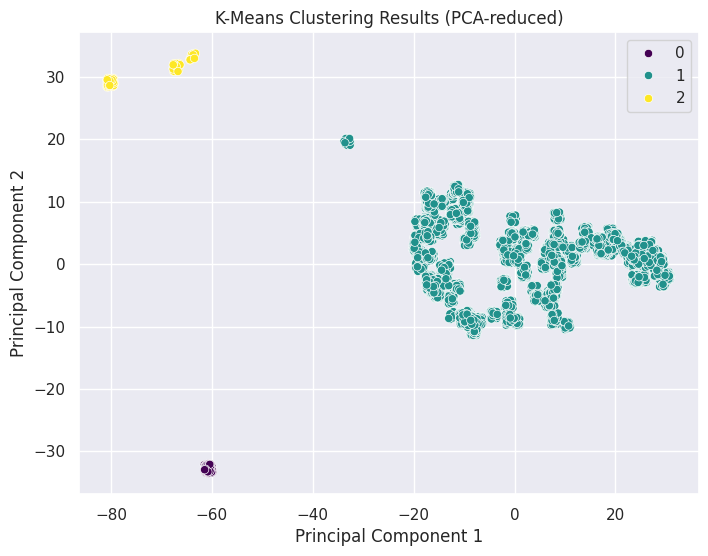

In [ ]:
from sklearn.decomposition import PCA
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(klaster)

# Plotting the clusters in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', legend='full')
plt.title('K-Means Clustering Results (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Interpretasi:**

1. Cluster 0 dapat diidentifikasi sebagai titik ungu di bagian kiri bawah. Klaster ini menunjukkan kumpulan data yang berada pada wilayah yang relatif terisolasi, dengan nilai PCA rendah. Berdasarkan tabel yang diberikan, klaster ini memiliki jumlah populasi kota yang lebih kecil, berlokasi di dekat Hawaii dan jarak ke lokasi merchant cukup besar (sekitar 80 km).
2. Cluster 1 merupakan** klaster utama**, berwarna hijau, dengan sebaran luas di sekitar pusat grafik. Berdasarkan informasi tambahan, klaster ini mencakup sebagian besar pelanggan Pinjaman 'R Us, dengan nilai rata-rata populasi kota yang lebih tinggi (sekitar 108746).
3. Cluster 2 ditunjukkan oleh titik berwarna kuning di bagian atas kiri. Klaster ini memiliki jarak yang relatif dekat ke merchant dibanding klaster lain, dengan nilai rata-rata jarak 62 km. Dari segi geografis, klaster ini berlokasi di dekat wilayah Alaska.

In [ ]:
import folium
from geopy.geocoders import Nominatim
from geopy.geocoders import Photon
geolocator = Photon(user_agent="measurements")

In [ ]:
# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Define colors for clusters
colors = {0: 'red', 1: 'blue', 2: 'green' }

In [ ]:
# Add Reporter markers to the map
for i, row in b2.iterrows():
    lat = row['lat']
    lon = row['long']
    folium.Marker(
        location=[lat, lon],
        popup=row.index,
        icon=folium.Icon(color=colors[row['cluster']])
    ).add_to(m)

In [ ]:
# Save map to an HTML file
m.save('/content/drive/MyDrive/Gelar Rasa 2024/Clusters_map.html')

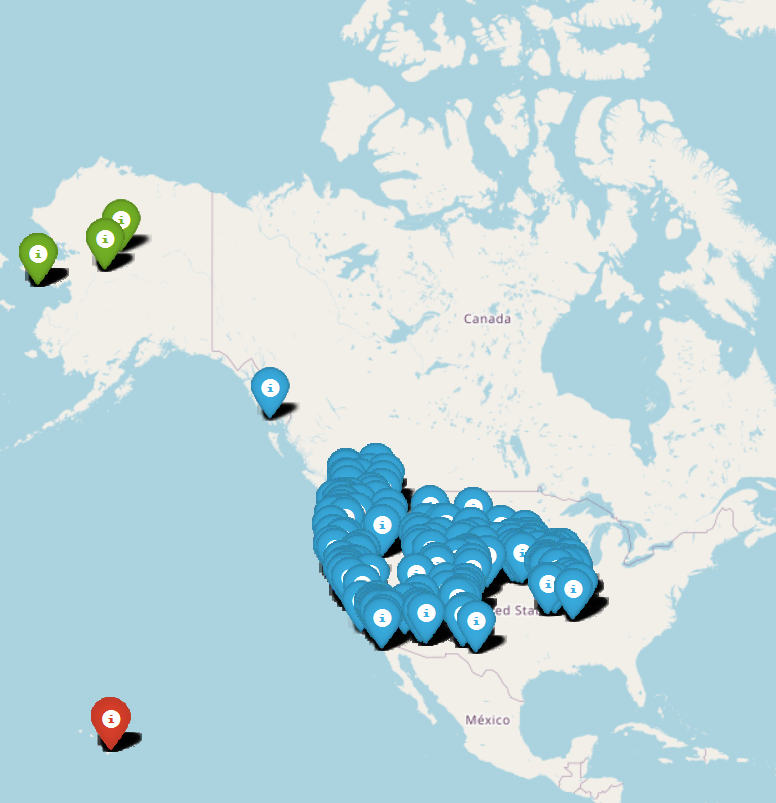

**Interpretasi:**
Pada peta, klaster 0 yang ditandai dengan titik merah berada di wilayah Hawaii, klaster 1 yang ditandai dengan biru berada di daratan utama AS, klaster 2 yang ditandai dengan titik-titik hijau berada di wilayah Alaska. Sebagian besar pelanggan terletak di wilayah daratan utama AS (klaster biru), yang juga menunjukkan bahwa mereka mungkin tinggal di kota-kota besar atau area padat penduduk.


####Rekomendasi
Sebagian besar pelanggan Pinjaman 'R Us berasal dari wilayah daratan utama Amerika Serikat, terutama di kota-kota besar. Berikut beberapa rekomendasi untuk meningkatkan jumlah pelanggan:

1. Fokus pada kota-Kota besar dan area padat penduduk, karena sebagian besar pelanggan berada di wilayah berpopulasi tinggi, seperti yang terlihat pada klaster biru, Pinjaman 'R Us dapat memperkuat strategi pemasarannya di kota-kota besar dan area padat penduduk.
2. Meningkatkan akses di area rural dan wilayah terisolasi, seperti Alaska dan Hawaii. Meningkatkan akses pinjaman di area tersebut melalui kampanye digital atau agen lokal dapat menarik lebih banyak pelanggan dari wilayah tersebut.
3. Mengingat rata-rata jarak ke merchant cukup jauh untuk klaster utama, menambah titik layanan atau merchant yang bekerja sama di daerah-daerah strategis akan memudahkan pelanggan untuk mengakses layanan pinjaman.

##  Model Klasifikasi Penipuan (Fraud Detection)
Untuk membantu pekerja frontline dalam menilai penipuan kartu kredit
Anda perlu membuat model klasifikasi (K nearest neighbor, Naïve Bayes, dll.) berdasarkan kumpulan data yang tersedia untuk Anda. Anda bebas menggunakan variabel apa pun dalam dataset.

Salah satu karyawan Anda menyarankan untuk membagi kumpulan data menjadi dua
(pelatihan dan pengujian) untuk membuat model klasifikasi ini. Karena ketidak rataan data, pendekatan bertingkat untuk membagi kumpulan data mungkin diperlukan

### Pemodelan
Jelaskan variabel apa yang Anda gunakan dari kumpulan data, metode klasifikasi yang digunakan, dan bagaimana kumpulan data tersebut dibagi menjadi data pelatihan dan pengujian.

Sebelum melakukan pemodelan, diberikan beberapa ringkasan berguna yang didapatkan dari EDA.

1. Terdapat imbalanced data dengan fraud hanya 12% dari 14446 data.
2. Pada tahun 2020, di bulan desember terdapat lonjakan transaksi, transaksi selain pada Desember adalah fraud.
3. Transaksi pada tanggal 2 hingga 12 dan tanggal 23 selalu fraud. Selain itu, jam 22 hingga 3 memiliki peluang fraud lebih tinggi.
4. Jumlah tagihan tinggi cenderung bukan penipu.
5. Terdapat beberapa kota lokasi pembelian dan beberapa pekerjaan yang cenderung hanya fraud atau hanya tidak fraud saja.  

#### Variabel dan Metrik yang digunakan

In [ ]:
data.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour', 'minute',
       'second', 'day_of_week', 'usia', 'jarak_km'],
      dtype='object')

Dalam pemodelan klasifikasi, akan dilakukan beberapa penghapusan variabel (drop variabel). Beberapa variabel yang dihapus adalah,

1. **trans_date_trans_time** : karena sudah terdapat variabel partisi berupa month, day, dan hour, dll.
2. **lat** : karena sudah diwakili variabel dummy kota dan state.
3. **long** : karena sudah diwakili variabel dummy kota dan state.
4. **dob** : karena sudah diwakili variabel usia.
5. **trans_num** : karena merupakan unik value.
6. **merch_lat** : sudah diwakili nama merchant.
7. **merch_long** : sudah diwakili nama merchant.

Jadi, variabel yang digunakan adalah:

- **Numerik**: 'amt','city_pop', 'year', 'month', 'day', 'hour', 'minute', 'second', 'jarak_km', dan 'usia'.

- **Kategorik**: 'category', 'state', 'city', 'job', 'merchant', dan 'day_of_week'.

Juga dilakukan konversi menjadi dummy pada variabel kategorik dengan one-hot encoding.

In [ ]:
features = ['merchant', 'category', 'amt', 'city', 'state', 'city_pop', 'job',
            'year', 'month', 'day', 'hour', 'minute', 'second',
            'day_of_week', 'usia', 'jarak_km']


# Assuming 'data' is your DataFrame and 'is_fraud' is your target variable
X = data[features]
y = data['is_fraud']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['category', 'state', 'city', 'job', 'merchant', 'day_of_week']).astype(int)

#### Pembagian data train dan test
Karena kasus ini adalah time series, kita tidak dapat membagi data secara acak. Kita harus tetap **mempertahankan urutan (time series split)**. **Data leakage** akan terjadi jika kita menggunakan data masa depan untuk memprediksi data pada masa lalu. Maka dalam kasus ini, **data train adalah data pada tahun 2019**, dimana variabel is_fraud relatif konsisten dibanding 2020 yang seluruh transaksinya fraud kecuali pada Desember. Lalu **data pada tahun 2020** akan digunakan untuk **data test**.

In [ ]:
X_train = X[X['year'] < 2020]
X_test = X[X['year'] == 2020]
y_train = y[X['year'] < 2020]
y_test = y[X['year'] == 2020]

In [ ]:
print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk y_test: {y_test.shape}")

Bentuk X_train: (7580, 1076)
Bentuk X_test: (6803, 1076)
Bentuk y_train: (7580,)
Bentuk y_test: (6803,)


#### Metrik yang digunakan

Untuk metrik yang digunakan dalam penentuan model terbaik adalah **PR-AUC (Precision-Recall Area Under the Curve)**.

Dalam kasus ini, kita akan meminimalkan kesalahan pada kasus non-fraud yang diprediksi sebagai fraud (false positive) karena **dalam bisnis kesalahan ini dapat mendatangkan komplain atau ketidakpuasan dari customer.** Hal ini bisa dilihat pada precision.

Metrik ini **mengukur keseimbangan antara precision dan recall** pada berbagai threshold dalam sebuah model klasifikasi. Metrik ini sangat berguna untuk mengevaluasi model pada **dataset yang imbalanced**, seperti pada kasus ini, di mana kelas positif/kasus yang ingin diprediksi (fraud) jauh lebih jarang daripada kelas negatif.

Jadi alasan dipilihnya metrik ini adalah karena
1. PR-AUC tidak terganggu dengan jumlah besar kasus non-fraud.
2. Skor PR-AUC yang lebih tinggi menunjukkan bahwa model mampu mempertahankan precision yang baik tanpa terlalu mengorbankan recall.

**Presisi** mengukur proporsi prediksi positif yang benar, yang dihitung sebagai:

$$
  \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
  $$


**Recall** (atau True Positive Rate) mengukur proporsi kasus positif aktual yang terprediksi dengan benar, yang dihitung sebagai:

$$ \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}} $$

#### Handling Imbalanced Data (Termasuk Pembagian data Train dan Test)

##### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming X and y are defined as in the previous code
under_sampling = RandomUnderSampler(random_state=42)
X_under_resampled, y_under_resampled = under_sampling.fit_resample(X_train, y_train)

##### Oversampling

Dalam oversampling, akan terdapat tambahan data sintesis. Oleh karena itu, berbeda dengan undersampling,  **oversampling dilakukan setelah pemisahan data train dan test/validasi**. Agar data yang menjadi **validation set selalu data asli bukan data sistesis** yang dapat menyebabkan data leakage. Library yang digunakan kali ini adalah SMOTE.

### Hasil Percobaan Awal

Pada percobaan awal, **seluruh variabel** di atas digunakan dalam prediktor, didapatkan bahwa model terbaik adalah **Catboost** baik menggunakan metode undersampling ataupun oversampling.

[Gambar Result Undersampling]

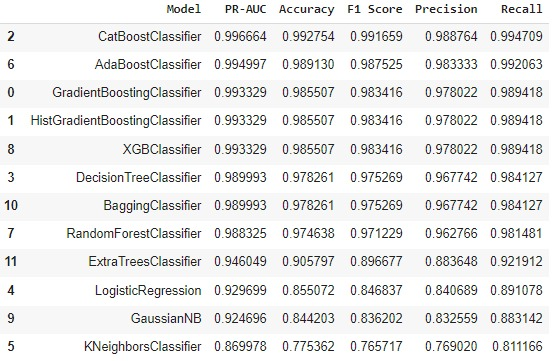


[Gambar Confussion Matriks Undersampling]

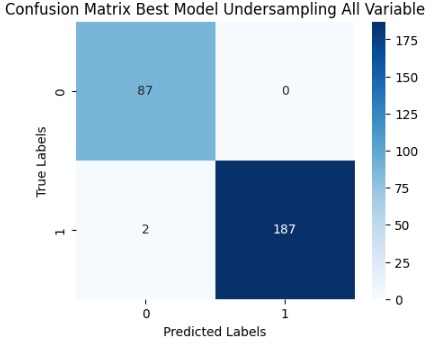

[Gambar Confussion Matriks Prediksi 2020 Undersampling]

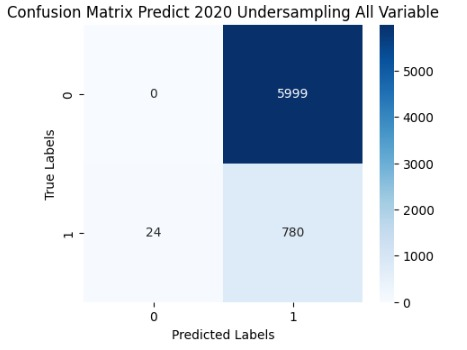

[Gambar Result Oversampling]

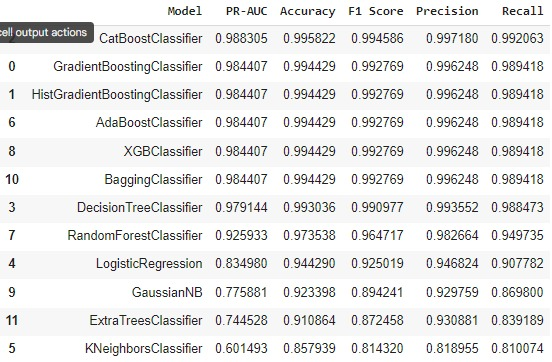

[Gambar Confussion Matriks Oversampling All Variable]

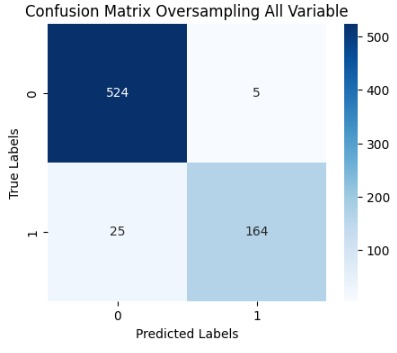

[Gambar Confussion Matriks Prediksi 2020 Oversampling]

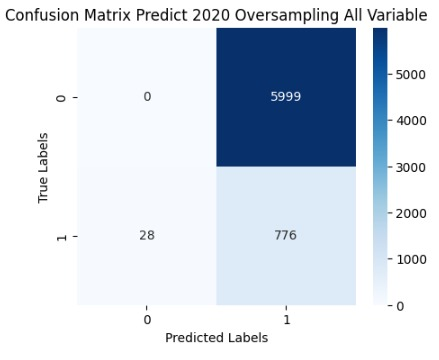

[Feature Importances]

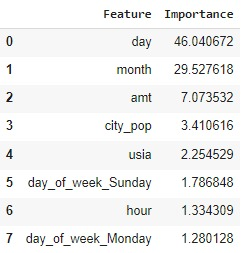

dapat dilihat bahwa **kedua model** ini mengalami **overfitting** sehingga tidak dapat memprediksi kelas negatif (non-fraud)

Penulis mengindikasikan bahwa hal ini dikarenakan fitur partisi waktu transaksi berupa **tahun, bulan, dan tanggal**. Ketiga fitur ini memiliki **feature importances yang sangat tinggi** akan tetapi juga diketahui bahwa ketiga fitur ini terindikasi **anomali dari hasil EDA**. Maka akan dilakukan pemodelan **tanpa** ketiga fitur tersebut.



### Percobaan Terakhir

Pada percobaan ini, dilakukan pemodelan dengan mengeluarkan 3 fitur yaitu 'year', 'month', dan 'day'.

#### Model Terbaik

##### Undersampling Data

In [ ]:
# Split data into training and testing sets
X_under_sampling_train = X_under_resampled[X_under_resampled['month'] < 11].drop(columns = ['year', 'month', 'day'])
X_under_sampling_test = X_under_resampled[X_under_resampled['month'] >= 11].drop(columns = ['year', 'month', 'day'])
y_under_sampling_train = y_under_resampled[X_under_resampled['month'] < 11].drop(columns = ['year', 'month', 'day'])
y_under_sampling_test = y_under_resampled[X_under_resampled['month'] >= 11].drop(columns = ['year', 'month', 'day'])

In [ ]:
print(f"Bentuk X_train: {X_under_sampling_train.shape}")
print(f"Bentuk X_test: {X_under_sampling_test.shape}")
print(f"Bentuk y_train: {y_under_sampling_train.shape}")
print(f"Bentuk y_test: {y_under_sampling_test.shape}")

Bentuk X_train: (1680, 1073)
Bentuk X_test: (276, 1073)
Bentuk y_train: (1680,)
Bentuk y_test: (276,)


In [ ]:
list_model = {
    'GradientBoostingClassifier':GradientBoostingClassifier(random_state=2024),
    'HistGradientBoostingClassifier':HistGradientBoostingClassifier(random_state=2024),
    'CatBoostClassifier':CatBoostClassifier(random_state=2024, silent=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=2024),
    'LogisticRegression': LogisticRegression(random_state=2024),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=2024),
    'RandomForestClassifier': RandomForestClassifier(random_state=2024),
    'XGBClassifier': XGBClassifier(random_state=2024),
    'Naive Bayes': GaussianNB(),
    'BaggingClassifier': BaggingClassifier(random_state=2024),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=2024),
}

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, average_precision_score

In [ ]:
result = []
for model in list_model:
    model = list_model[model]
    print(f'Model : {type(model).__name__}')
    model.fit(X_under_sampling_train, y_under_sampling_train)
    y_pred = model.predict(X_under_sampling_test)

    # Hitung nilai berdasarkan model yang sudah di train / fit dan hasil prediksinya
    accuracy = accuracy_score(y_under_sampling_test, y_pred)
    # Calculate precision, recall, F1-score and support for each class
    precision, recall, f1, support = precision_recall_fscore_support(y_under_sampling_test, y_pred, average='macro')
    pr_auc = average_precision_score(y_under_sampling_test, y_pred)


    # Kumpulkan nilai-nilai di atas menjadi satu
    hasil = {
        'Model' : type(model).__name__,
        'PR-AUC' : pr_auc,
        'Accuracy' : accuracy,
        'F1 Score' : f1,
        'Precision' : precision,
        'Recall' : recall
    }

    print('Done')

    # Simpan nilai model ini dalam list result
    result.append(hasil)

Model : GradientBoostingClassifier
Done
Model : HistGradientBoostingClassifier
Done
Model : CatBoostClassifier
Done
Model : DecisionTreeClassifier
Done
Model : LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done
Model : KNeighborsClassifier
Done
Model : AdaBoostClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Done
Model : RandomForestClassifier
Done
Model : XGBClassifier
Done
Model : GaussianNB
Done
Model : BaggingClassifier
Done
Model : ExtraTreesClassifier
Done


In [ ]:
# Ubah menjadi dataframe
result_all_under = pd.DataFrame(result)
result_all_under.sort_values('PR-AUC', ascending=False)

Model    PR-AUC  Accuracy  F1 Score  Precision  \
1   HistGradientBoostingClassifier  0.974725  0.952899  0.947154   0.935967   
8                    XGBClassifier  0.969722  0.942029  0.935469   0.922885   
0       GradientBoostingClassifier  0.964378  0.945652  0.938691   0.929167   
2               CatBoostClassifier  0.962711  0.942029  0.934783   0.924610   
10               BaggingClassifier  0.959379  0.934783  0.927023   0.915768   
3           DecisionTreeClassifier  0.942698  0.927536  0.917563   0.910982   
7           RandomForestClassifier  0.931180  0.865942  0.857005   0.847756   
6               AdaBoostClassifier  0.922696  0.876812  0.865512   0.853596   
9                       GaussianNB  0.921361  0.836957  0.829149   0.827345   
4               LogisticRegression  0.899569  0.833333  0.821876   0.813841   
11            ExtraTreesClassifier  0.879543  0.782609  0.773956   0.778723   
5             KNeighborsClassifier  0.873072  0.775362  0.766421   0.771474   

      Recall  
1   0.962507  
8   0.954570  
0   0.951013  
2   0.948367  
10  0.943076  
3   0.925379  
7   0.895913  
6   0.891443  
9   0.877851  
4   0.856596  
11  0.822660  
5   0.814267

Didapatkan bahwa model terbaik untuk **metode undersampling** adalah **HistGradientBoosting** dengan nilai PR-AUC sebesar 0.974725

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
best_model_under = HistGradientBoostingClassifier(random_state=2024)
best_model_under.fit(X_under_sampling_train, y_under_sampling_train)
y_pred = best_model_under.predict(X_under_sampling_test)
y_pred_train = best_model_under.predict(X_under_sampling_train)

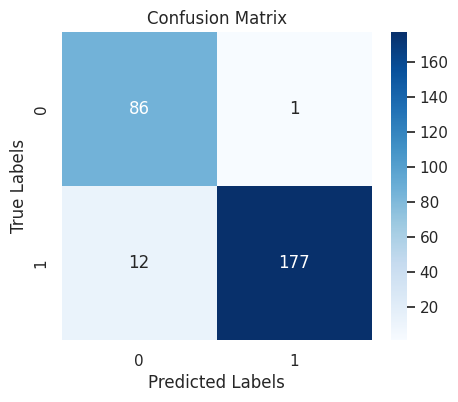

In [ ]:
cm = confusion_matrix(y_under_sampling_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Sesuai dengan nilai PR-AUC, terlihat bahwa model ini dapat membedakan kelas positif dan negatif dengan baik dan nilai false positive sudah lebih kecil daripada false negative.

##### Oversampling Data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
list_model = {
    'GradientBoostingClassifier':GradientBoostingClassifier(random_state=2024),
    'HistGradientBoostingClassifier':HistGradientBoostingClassifier(random_state=2024),
    'CatBoostClassifier':CatBoostClassifier(random_state=2024, silent=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=2024),
    'LogisticRegression': LogisticRegression(random_state=2024),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=2024),
    'RandomForestClassifier': RandomForestClassifier(random_state=2024),
    'XGBClassifier': XGBClassifier(random_state=2024),
    'Naive Bayes': GaussianNB(),
    'BaggingClassifier': BaggingClassifier(random_state=2024),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=2024),
}

In [ ]:
result = []
for model in list_model:
    model = list_model[model]
    print(f'Model : {type(model).__name__}')
    X_over_sampling_train = X_train[X_train['month'] < 11].drop(columns = ['year', 'month', 'day'])
    X_over_sampling_test = X_train[X_train['month'] >= 11].drop(columns = ['year', 'month', 'day'])
    y_over_sampling_train = y_train[X_train['month'] < 11].drop(columns = ['year', 'month', 'day'])
    y_over_sampling_test = y_train[X_train['month'] >= 11].drop(columns = ['year', 'month', 'day'])

    smote = SMOTE(sampling_strategy = 'auto', random_state=42)
    X_over_sampling_train, y_over_sampling_train = smote.fit_resample(X_over_sampling_train, y_over_sampling_train)

    model.fit(X_over_sampling_train, y_over_sampling_train)
    y_pred = model.predict(X_over_sampling_test)

    # Hitung nilai berdasarkan model yang sudah di train / fit dan hasil prediksinya
    accuracy = accuracy_score(y_over_sampling_test, y_pred)
    # Calculate precision, recall, F1-score and support for each class
    precision, recall, f1, support = precision_recall_fscore_support(y_over_sampling_test, y_pred, average='macro')
    pr_auc = average_precision_score(y_over_sampling_test, y_pred)


    # Kumpulkan nilai-nilai di atas menjadi satu
    hasil = {
        'Model' : type(model).__name__,
        'PR-AUC' : pr_auc,
        'Accuracy' : accuracy,
        'F1 Score' : f1,
        'Precision' : precision,
        'Recall' : recall
    }

    print('Done')

    # Simpan nilai model ini dalam list result
    result.append(hasil)

Model : GradientBoostingClassifier
Done
Model : HistGradientBoostingClassifier
Done
Model : CatBoostClassifier
Done
Model : DecisionTreeClassifier
Done
Model : LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Done
Model : KNeighborsClassifier
Done
Model : AdaBoostClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Done
Model : RandomForestClassifier
Done
Model : XGBClassifier
Done
Model : GaussianNB
Done
Model : BaggingClassifier
Done
Model : ExtraTreesClassifier
Done


In [ ]:
result_all_over = pd.DataFrame(result)
result_all_over.sort_values('PR-AUC', ascending=False)

Model    PR-AUC  Accuracy  F1 Score  Precision  \
1   HistGradientBoostingClassifier  0.894749  0.963788  0.951628   0.970177   
2               CatBoostClassifier  0.876871  0.958217  0.944186   0.962438   
8                    XGBClassifier  0.871918  0.956825  0.942433   0.959543   
0       GradientBoostingClassifier  0.841868  0.947075  0.929302   0.946961   
10               BaggingClassifier  0.820866  0.940111  0.919850   0.938171   
6               AdaBoostClassifier  0.802283  0.934540  0.913360   0.925530   
7           RandomForestClassifier  0.777862  0.922006  0.889363   0.943440   
9                       GaussianNB  0.762766  0.919220  0.888696   0.922459   
3           DecisionTreeClassifier  0.690405  0.894150  0.862135   0.866054   
4               LogisticRegression  0.676190  0.888579  0.854879   0.858720   
5             KNeighborsClassifier  0.585413  0.849582  0.806103   0.806103   
11            ExtraTreesClassifier  0.520888  0.830084  0.715216   0.887204   

      Recall  
1   0.936318  
2   0.929137  
8   0.928191  
0   0.914774  
10  0.904947  
6   0.902867  
7   0.856953  
9   0.865264  
3   0.858453  
4   0.851272  
5   0.806103  
11  0.682350

Sama dengan metode undersampling, **metode oversampling** memiliki model terbaik **HistGradientBoosting**.

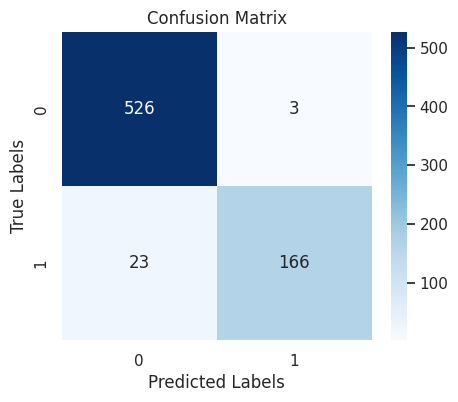

In [ ]:
best_model_over = HistGradientBoostingClassifier(random_state=2024)

X_over_sampling_train = X_train[X_train['month'] < 11].drop(columns = ['year', 'month', 'day'])
X_over_sampling_test = X_train[X_train['month'] >= 11].drop(columns = ['year', 'month', 'day'])
y_over_sampling_train = y_train[X_train['month'] < 11].drop(columns = ['year', 'month', 'day'])
y_over_sampling_test = y_train[X_train['month'] >= 11].drop(columns = ['year', 'month', 'day'])

smote = SMOTE(sampling_strategy = 'auto', random_state=42)
X_over_sampling_train, y_over_sampling_train = smote.fit_resample(X_over_sampling_train, y_over_sampling_train)

best_model_over.fit(X_over_sampling_train, y_over_sampling_train)
y_pred = best_model_over.predict(X_over_sampling_test)

cm = confusion_matrix(y_over_sampling_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Evaluasi Model
Dalam **evaluasi model**, dilakukan **prediksi penipuan pada data 2020** dengan menggunakan model terbaik masing-masing metode.

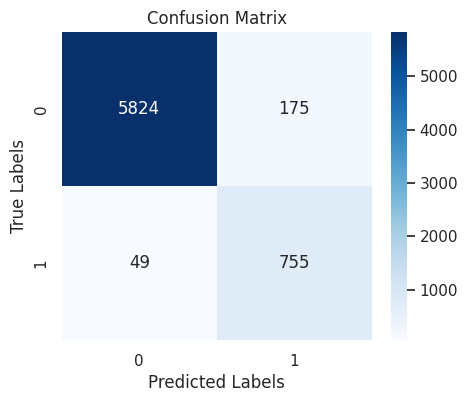

In [ ]:
best_model_under.fit(X_under_resampled.drop(columns = ['year', 'month', 'day']), y_under_resampled)
y_pred_2020_under = best_model_under.predict(X_test.drop(columns = ['year', 'month', 'day']))

cm = confusion_matrix(y_test, y_pred_2020_under)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_2020_under))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5999
           1       0.81      0.94      0.87       804

    accuracy                           0.97      6803
   macro avg       0.90      0.95      0.93      6803
weighted avg       0.97      0.97      0.97      6803



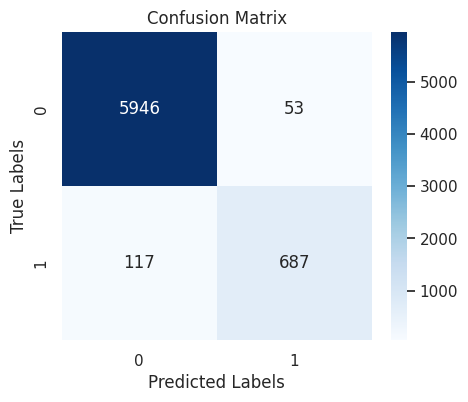

In [ ]:
X_over_resampled, y_over_resampled = smote.fit_resample(X_train, y_train)
best_model_over.fit(X_over_resampled.drop(columns = ['year', 'month', 'day']), y_over_resampled)
y_pred_2020_over = best_model_over.predict(X_test.drop(columns = ['year', 'month', 'day']))

cm = confusion_matrix(y_test, y_pred_2020_over)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_2020_over))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5999
           1       0.93      0.85      0.89       804

    accuracy                           0.98      6803
   macro avg       0.95      0.92      0.94      6803
weighted avg       0.97      0.98      0.97      6803



Dari evaluasi kedua model terbaik, didapatkan bahwa model dengan **metode oversampling** dapat mengklasifikasikan data transaksi dengan **lebih baik**. Ia juga dapat mengurangi kesalahan prediksi penipuan padahal bukan penipuan. Hal ini dihindari karena meminimalkan ketidakpercayaan pelanggan. Akan tetapi tetap memerhatikan/meminimalkan false negative (penipuan tidak terdeteksi)

Dari 6803 data tahun 2020 yang diprediksi didapatkan:
- penipuan sebenarnya adalah penipuan: 687
- penipuan sebenarnya bukanlah penipuan: 53
- bukan penipu ternyata bukan penipu: 5946
- bukan penipu, ternyata penipuan: 117

Precision: 93%

Recall: 85%

In [ ]:
# Get feature importances from the best_model_over (CatBoostClassifier)
model = CatBoostClassifier(random_state=2024, silent=True)
model.fit(X_over_resampled.drop(columns = ['year', 'month', 'day']), y_over_resampled)
feature_importances = model.get_feature_importance(prettified=True)

# Create a DataFrame from the feature importances
feature_importance_df = pd.DataFrame(feature_importances)

# Rename the columns for better readability
feature_importance_df = feature_importance_df.rename(columns={
    "Feature Id": "Feature",
    "Importances": "Importance"
})


In [ ]:
# Print or display the feature importances
feature_importance_df[feature_importance_df['Importance'] > 1]

Feature  Importance
0                       amt   33.148237
1      category_grocery_pos    9.062780
2     category_shopping_net    5.828929
3    category_gas_transport    5.793964
4     category_shopping_pos    5.699650
5             category_home    4.346574
6    category_entertainment    3.997655
7                      hour    3.481017
8        category_kids_pets    2.989271
9         category_misc_net    2.962625
10     category_food_dining    2.334131
11  category_health_fitness    2.092146
12       day_of_week_Sunday    2.026401
13   category_personal_care    1.929866
14                     usia    1.689087
15     category_grocery_net    1.551461
16                 city_pop    1.323157
17        category_misc_pos    1.308130
18      day_of_week_Tuesday    1.212712

Karena HistBoosting tidak memiliki features importances, akan dilihat menggunakan model CatBoost (model terbaik kedua). Didapatkan beberapa fitur importances tertinggi sebagai berikut,

1. amt
2. beberapa variabel dummy category
3. hour
4. beberapa variabel dummy hari dalam seminggu


## Ringkasan Pemodelan Klasifikasi
Dilakukan pemodelan klasifikasi untuk mendeteksi fraud pada transaksi. **Variabel yang digunakan** adalah

- **Numerik**: 'amt','city_pop', 'hour', 'minute', 'second', 'jarak_km', dan 'usia'.

- **Kategorik**: 'category', 'state', 'city', 'job', 'merchant', dan 'day_of_week'.

Karena data merupakan time series, maka **urutan diperhatikan** untuk menghindari data leakage. Data dibagi menjadi data train dan data test. **Data train** berupa data transaksi pada **tahun 2019** lalu **data test berupa data transaksi 2020**.

Dengan menggunakan **oversampling** untuk menangani imbalanced data, didapatkan model terbaik untuk mendeteksi fraud tanpa overfitting adalah **model HistBoostingClassifier**.

Dari pemodelan ini didapatkan beberapa **anomali** dimana dapat mencirikan/menambah peluang suatu transaksi diklasifikasikan kelompok tertentu. Akan tetapi hal itu juga dapat menambah bias jika dimasukkan model. Beberapa **variabel yang berpengaruh tinggi** pada model adalah amt, hour, beberapa variabel dummy category dan hari dalam seminggu.